<a href="https://colab.research.google.com/github/pachterlab/CP_2022/blob/main/notebooks/fig1e_h/clusterValDistortions_smlData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon Mar 28 19:40:20 UTC 2022


In [2]:
import requests
import os


In [3]:
#Download datasets




from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
	url = 'https://api.datacite.org/dois/'+doi+'/media'
	r = requests.get(url).json()
	netcdf_url = r['data'][0]['attributes']['url']
	r = requests.get(netcdf_url,stream=True)
	#Set file name
	fname = doi.split('/')[-1]+ext
	#Download file with progress bar
	if r.status_code == 403:
		print("File Unavailable")
	if 'content-length' not in r.headers:
		print("Did not get file")
	else:
		with open(fname, 'wb') as f:
			total_length = int(r.headers.get('content-length'))
			pbar = tnrange(int(total_length/1024), unit="B")
			for chunk in r.iter_content(chunk_size=1024):
				if chunk:
					pbar.update()
					f.write(chunk)
		return fname



#SMART-seq VMH data
#metadata.csv
download_file('10.22002/D1.2067','.gz')

#smartseq.mtx (log counts)
download_file('10.22002/D1.2071','.gz')



#MERFISH data
#metadata.csv
download_file('10.22002/D1.2063','.gz')

#counts.h5ad
download_file('10.22002/D1.2064','.gz')

#10x VMH data
#metadata.csv
download_file('10.22002/D1.2065','.gz')

#tenx.mtx (log counts)
download_file('10.22002/D1.2072','.gz')



os.system("gunzip *.gz")



os.system("mv D1.2067 smartmetadata.csv")
os.system("mv D1.2071 smartseq.mtx")

os.system("mv D1.2063 metadata.csv")
os.system("mv D1.2064 counts.h5ad")

os.system("mv D1.2065 tenxmetadata.csv")
os.system("mv D1.2072 tenx.mtx")


#C. elegans data
#Pseudotime Packer & Zhu C. elegans data
#counts.mtx
download_file('10.22002/D1.2060','.gz')

#cells.csv
download_file('10.22002/D1.2061','.gz')

#genes.csv
download_file('10.22002/D1.2062','.gz')

os.system("gunzip *.gz")

os.system("mv D1.2060 wormcounts.mtx")
os.system("mv D1.2061 wormcells.csv")
os.system("mv D1.2062 wormgenes.csv")




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/64 [00:00<?, ?B/s]

  0%|          | 0/26700 [00:00<?, ?B/s]

  0%|          | 0/9784 [00:00<?, ?B/s]

  0%|          | 0/59360 [00:00<?, ?B/s]

  0%|          | 0/940 [00:00<?, ?B/s]

  0%|          | 0/104912 [00:00<?, ?B/s]

  0%|          | 0/14905 [00:00<?, ?B/s]

  0%|          | 0/561 [00:00<?, ?B/s]

  0%|          | 0/165 [00:00<?, ?B/s]

0

In [4]:
#Read in files from NCBI GEO
os.system("wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.MetaData.105.csv.gz")
os.system("wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv.gz")

os.system("wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv.gz")


0

In [5]:
os.system("gunzip *.gz")

0

In [6]:
os.system("git clone https://github.com/hhcho/densvis.git")

0

In [7]:
%cd ./densvis/densne/


!g++ sptree.cpp densne.cpp densne_main.cpp -o den_sne -O2
import densne

/content/densvis/densne
densne.cpp: In function ‘bool DENSNE::load_data(double**, int*, int*, int*, double*, double*, int*, int*, double*, double*, bool*, double**)’:
densne.cpp:961:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(n, sizeof(int), 1, h);                                            // number of datapoints
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:962:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(d, sizeof(int), 1, h);                                            // original dimensionality
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:963:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(theta, sizeof(double), 1, h);                                        // gradient acc

In [8]:
%cd ../../

/content


In [9]:
!gunzip *.gz

gzip: *.gz: No such file or directory


In [10]:
!git clone https://github.com/pachterlab/CP_2022.git

Cloning into 'CP_2022'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (285/285), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 285 (delta 138), reused 86 (delta 20), pack-reused 0
Receiving objects: 100% (285/285), 71.50 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [11]:
%cd ./CP_2022/scripts

/content/CP_2022/scripts


In [12]:
!pip3 install --quiet torch
!pip3 install --quiet anndata
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn
!pip3 install --quiet torchsummary
!pip install --quiet scanpy==1.7.0rc1
!pip3 install --quiet umap-learn

     |████████████████████████████████| 96 kB 3.8 MB/s 
     |████████████████████████████████| 10.2 MB 10.0 MB/s 
     |████████████████████████████████| 69 kB 6.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


## **Install Packages**

In [43]:
import networkx as nx
import anndata 
import pandas as pd
import numpy as np

import visualizations as vis
import tools as tl
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
import matplotlib.patches as patches
import itertools
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline
sc.set_figure_params(dpi=125)
#sns.set_style('white')

In [14]:
sc.set_figure_params(dpi=125)

## **Plot Distributions of Ambient and Latent Inter/Intra-Type Distance**

### **Define analysis and plotting functions**

In [15]:

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '../..'

pcs = 50
n_latent = 50


In [16]:
def latentCompParams(scaled_mat, log_mat, ndims=2, neigh=[15,50,100], rounds = 3):
  """ Compute latent space representations as baseline for reconstruction abilities"""
   # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  #tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  latents += [log_mat]
  latentLab += ['Ambient']
  latentType += ['Ambient']

  tsvd = TruncatedSVD(n_components=pcs)
  x_pca = tsvd.fit_transform(scaled_mat)

  for i in range(rounds):

    for j in neigh:
      reducer = umap.UMAP(n_components = ndims, n_neighbors=j)
      pcaUMAP = reducer.fit_transform(x_pca)
      #pcaDensUMAP = densUMAP.fit_transform(x_pca)

      #pcaTSNE = tsne.fit_transform(x_pca)

      latents += [pcaUMAP]
      latentLab += ['PCA '+str(pcs)+'D UMAP '+str(j)]
      latentType += ['2D']

  latents += [x_pca]
  latentLab += ['PCA '+str(pcs)+'D']
  latentType += [str(pcs)+'D']




  return latents,latentLab,latentType

In [17]:
def latentCompMNIST(scaled_mat,log_mat, ndims=2, pcs=[50,100], rounds = 3):
  """ Compute latent space representations as baseline for reconstruction abilities"""
  reducer = umap.UMAP(n_components = ndims) # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  latents += [log_mat]
  latentLab += ['Ambient']
  latentType += ['Ambient']


  for i in range(rounds):

    for j in pcs:

      tsvd = TruncatedSVD(n_components=j)
      x_pca = tsvd.fit_transform(scaled_mat)
    
      pcaUMAP = reducer.fit_transform(scaled_mat)
      #pcaDensUMAP = densUMAP.fit_transform(x_pca)

      pcaTSNE = tsne.fit_transform(scaled_mat)

      latents += [x_pca,pcaTSNE, pcaUMAP]
      latentLab += ['PCA '+str(j)+'D','t-SNE','UMAP']
      latentType += [str(j)+'D','2D','2D']

  tsvd = TruncatedSVD(n_components=2)
  x_pca = tsvd.fit_transform(scaled_mat)

  latents += [x_pca]
  latentLab += ['PCA 2D']
  latentType += ['2D']


  return latents,latentLab,latentType

In [18]:
def getInterVar2(embed, inLab):
  """ Compute inter-distances for inner label
  embed : Numpy array for latent space (n_obs x n_features or n_latent)
  inLab : 1D array for inner label (e.g. sex)
  Returns:
  List of average pairwise distances between labels in inLab"""


  avg_dists = []

  ins = np.unique(inLab)

  pairs = list(itertools.combinations(ins, 2))
  for p in pairs:

    sub_1 = embed[inLab == p[0],:]
    sub_2 = embed[inLab == p[1],:]
    avg_dists += [np.mean(pairwise_distances(sub_1,sub_2,metric='l1').flatten().tolist())]

  return avg_dists

In [19]:
def getAllVars(latents,latentLab,latentType,clusters):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]
    d = latentType[p]

    c = getInterVar2(i, clusters)
    #c = [x for x in c if x != 0.0]
    vals += c
    emb += [l]*len(c)
    dist += ['Inter-Type']*len(c)

    intraC = tl.getIntraVar(i, clusters, clusters)
    vals += intraC
    dist += ['Intra-Type']*len(intraC)

    emb += [l]*len(intraC)



  allVals['Latent'] = emb
  allVals['Distance'] = dist
  allVals['Value'] = vals



  return allVals

In [20]:
def rankClus(embed, inLab):
  """ Compute inter-distances for inner label
  embed : Numpy array for latent space (n_obs x n_features or n_latent)
  inLab : 1D array for inner label (e.g. sex)
  Returns:
  Dictionary with avg distances between labeled groups, for each label"""


  avg_dists = []
  

  ins = np.unique(inLab)
  d = np.zeros((len(ins),len(ins)))

  for i in range(len(ins)):

    avg_dists = []
    for j in ins:

      sub_1 = embed[inLab == ins[i],:]
      sub_2 = embed[inLab == j,:]
      avg_dists += [np.mean(pairwise_distances(sub_1,sub_2,metric='l1').flatten().tolist())]
      
    d[i,:] = avg_dists



  return d

In [21]:
def intraVar(embed, inLab):
  """ Compute inter-distances for inner label
  embed : Numpy array for latent space (n_obs x n_features or n_latent)
  inLab : 1D array for inner label (e.g. sex)
  Returns:
  Dictionary with avg distances between labeled groups, for each label"""


  avg_dists = []
  

  ins = np.unique(inLab)


  for i in range(len(ins)):



    sub_1 = embed[inLab == ins[i],:]

    avg = pairwise_distances(sub_1,sub_1,metric='l1').flatten().tolist()
    avg_dists += [np.mean([i for i in avg if i != 0])]
      




  return avg_dists

In [22]:
def getAllNeigh(latents,latentLab,latentType,clusters):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  amb = latents[0]
  cAmb = rankClus(amb, clusters)

  latents = latents[1:]
  latentLab = latentLab[1:]

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]


    c = rankClus(i, clusters)
    #c = [x for x in c if x != 0.0]

    for x in range(c.shape[0]):
      tau, p_value = stats.kendalltau(c[x,:], cAmb[x,:])
      vals += [tau]


    emb += [l]*c.shape[0]
 

  allVals['Latent'] = emb

  allVals['Tau'] = vals



  return allVals

In [23]:
def getIntra(latents,latentLab,latentType,clusters):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  amb = latents[0]
  cAmb = intraVar(amb, clusters)

  latents = latents[1:]
  latentLab = latentLab[1:]

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]


    c = intraVar(i, clusters)
    #c = [x for x in c if x != 0.0]


    v = stats.pearsonr(c, cAmb)
    vals += [v[0]]


    emb += [l]
 

  allVals['Latent'] = emb

  allVals['r'] = vals



  return allVals

In [24]:
#How many of each digit were in the same cluster
#for each digit, get indices, find how many of those indices have the same value in labels
def getKMeans(labels,origLabs,name):
  frac = []
  for d in pd.unique(origLabs):

    inds = origLabs.isin([d])
    sub = labels[inds]

    unique, counts = np.unique(sub, return_counts=True)
    frac += [max(counts)/len(sub)]

  df = pd.DataFrame()
  df['Cluster'] = pd.unique(origLabs)
  df['Fraction'] = frac
  df['Embedding'] = [name]*len(frac)
  
  return df

Plotting

In [25]:
#Plot kmeans clusters colored by their majority cell type


def plotKmeans(latent,palette,labels,origLabs, size=5,figsize=(7,5),fname='',alpha=0.5):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
    for d in np.unique(labels):
        inds = labels == d
        kmeans = labels[inds]
        sub_d = origLabs[inds]
        unique, counts = np.unique(sub_d, return_counts=True)

        sub = latent[inds,:]
        #Get index of max counts
        clus = unique[np.argmax(counts)]
        
    
        #sns.scatterplot(sub[:,0],sub[:,1],label=clus, color = palette[clus], alpha=0.5,size=size,legend=False)
        sns.scatterplot(sub[:,0],sub[:,1],hue=[clus]*sub.shape[0], palette = palette, alpha=alpha,s=size)


#     handles, labels = plt.gca().get_legend_handles_labels()
#     by_label = dict(zip(labels, handles))
#     ax.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
#     ax.set_axis_off()

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
    ax.set_axis_off()


    plt.grid(False)
    fig.tight_layout()

    if(fname != None):
        plt.savefig(fname)
    else:
        plt.show()

  


In [26]:
def plotDots(ax,allVals, x, y ,hue, size, xlab='',ylab='',title='', axisFontSize = 11, tickFontSize = 10,legend=False):
  """ Plot histograms for inter/intra distances of nearest neighbors """

  #plt.figure(figsize=figsize)
  sns.boxplot(data=allVals, x=x, y=y, whis=np.inf,ax=ax,boxprops={'facecolor':'None'})
  if legend:
    g= sns.swarmplot(data=allVals, x=x, y=y, hue=hue, ax=ax,alpha=0.6,size=size) #
    labels=[t.get_text() for t in ax.legend_.texts]
    g.legend(handles=ax.legend_.legendHandles[3:6], labels=labels[3:6],prop={"size":9})
  else:
    g= sns.swarmplot(data=allVals, x=x, y=y, hue=hue, ax=ax,alpha=0.6,size=size)
    g.legend([],[], frameon=False)

  g.grid(False)
  g.set_xlabel(xlab,fontsize=axisFontSize)
  g.set_ylabel(ylab,fontsize=axisFontSize)
  g.set_title(title,fontsize=axisFontSize)

  g.tick_params(labelsize=tickFontSize)

  g.spines['right'].set_visible(False)
  g.spines['top'].set_visible(False)

In [27]:
def plotNeigh(allVals,size=3.5,axisFontSize = 9,figsize=(5,7),dpi=300,latent='Latent',rot=False):
    rows = ['50D']
    fig, ax = plt.subplots(nrows=len(rows), ncols=1,figsize=figsize,dpi=dpi)

    #colNames = ['Variance (log)','Max/Min Ratio','Max/Min Ratio KNNs']
    #cols = ['LogVars','Ratio','RatioKNN']


    for i in range(len(rows)):
        rowInds = [rows[i] in x for x in allVals[latent]]
        sub = allVals[rowInds]


        if i == 0:
            ylab = "Kendall's Tau Correlation"
        else:
            ylab= ''

        if i == 1:
            xlab = 'Embedding'
        else:
            xlab = ''

        plotDots(ax,sub,latent ,'Tau',latent,xlab=xlab,ylab=ylab,axisFontSize = axisFontSize,tickFontSize = axisFontSize,size=size,legend=False)


    if rot:
        plt.xticks(rotation=90)

  #plt.xticks(fontsize=5)
    plt.show()

In [28]:
def obj_plot_embed(latent, cluster_label, fname = None, palette = {}, alpha=0.4,figsize=(7,5)):
	""" Plot latent space in 2D and color cells by cluster_label """

	fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
	

	x = latent[:,0]
	y = latent[:,1]


	sns.scatterplot(x, y, s=20, alpha = alpha,hue=list(cluster_label), palette = palette) #label=list(cluster_label),
		
	handles, labels = plt.gca().get_legend_handles_labels()
	#by_label = dict(zip(labels, handles))
	ax.legend(handles, labels,loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
	ax.set_axis_off()

	fig.tight_layout()
	if(fname != None):
		plt.savefig(fname)
	else:
		plt.show()

In [29]:
def obj_plot_embed_flip(latent, cluster_label, fname = None, palette = {}, alpha=0.4,figsize=(7,5)):
  """ Plot latent space in 2D and color cells by randomly-ordered cluster_label """

  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
	

  rand_inds = np.random.choice(range(latent.shape[0]), latent.shape[0], replace=False)
  x = latent[rand_inds,0]
  y = latent[rand_inds,1]


  sns.scatterplot(x, y, s=20, alpha = alpha,hue=list(cluster_label[rand_inds]), palette = palette) #label=list(cluster_label),
		
  handles, labels = plt.gca().get_legend_handles_labels()
	#by_label = dict(zip(labels, handles))
  ax.legend(handles, labels,loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
  ax.set_axis_off()

  fig.tight_layout()
  if(fname != None):
    plt.savefig(fname)
  else:
    plt.show()

In [30]:
#Paint correct cells on bottom and 'wrongly' clustered digits on top
#Use Kmeans cluster labels


#For each set of Kmeans clusters inds paint cells in majority cell type label/cluster first
def plotOnTop(latent,palette,labels,origLabs, size=5,figsize=(7,5),fname='',alpha=0.5):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
    for d in np.unique(labels): #pd.unique(origLabs):
        inds = labels == d #origLabs.isin([d])
        kmeans = labels[inds]
        #origLabs.isin([d])
        sub_d = origLabs[inds]
        unique, counts = np.unique(sub_d, return_counts=True) #kmeans

        sub = latent[inds,:]
        #Get index of max counts
        clus = unique[np.argmax(counts)]
        cInds = sub_d.isin([clus])#kmeans == clus

        sub_d = sub_d[cInds]

        sub = sub[cInds,:]

        sns.scatterplot(sub[:,0],sub[:,1],hue=sub_d,palette=palette, alpha=alpha,s=size)

  #For each set of kmeans clusters paint cells in not the majority cell type/cluster
    for d in np.unique(labels): #pd.unique(origLabs):
        inds = labels == d #origLabs.isin([d])
        kmeans = labels[inds]
        sub_d = origLabs[inds]
        unique, counts = np.unique(sub_d, return_counts=True)

        sub = latent[inds,:]
        #Get index of max counts
        clus = unique[np.argmax(counts)]
        cInds = ~sub_d.isin([clus])#kmeans == clus

        sub_d = sub_d[cInds]

        sub = sub[cInds,:]

        sns.scatterplot(sub[:,0],sub[:,1],hue=sub_d,palette=palette,alpha=0.5,s=size)

    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
    ax.set_axis_off()


    plt.grid(False)
    fig.tight_layout()
    if(fname != None):
        plt.savefig(fname)
    else:
        plt.show()



### **Packer & Zhu et al *C. elegans* Data**




Read in data

In [ ]:
import scipy.io as sio
mtx = sio.mmread(data_path+'/wormcounts.mtx')
print(mtx.shape)

geneMeta = pd.read_csv(data_path+'/wormgenes.csv')
print(geneMeta.head())
cellMeta = pd.read_csv(data_path+'/wormcells.csv')
print(cellMeta.head())

(20222, 6188)
               id gene_short_name  num_cells_expressed
0  WBGene00010957          nduo-6                 6038
1  WBGene00010958          ndfl-4                 1597
2  WBGene00010959          nduo-1                 5342
3  WBGene00010960           atp-6                 5921
4  WBGene00010961          nduo-2                 2686
                       cell  n.umi  ... bg.b01.loading bg.b02.loading
0  AAACCTGCAAGACGTG-300.1.1   1003  ...      -2.284804      -2.130261
1  AAACCTGGTGTGAATA-300.1.1   1458  ...       1.640686       0.153481
2  AAACCTGTCGGCCGAT-300.1.1   1633  ...      -0.137057      -0.518981
3  AAAGATGGTTCGTTGA-300.1.1   1716  ...      -0.961214      -2.266003
4  AACCATGAGAAACCTA-300.1.1   1799  ...      -2.935370      -2.613732

[5 rows x 19 columns]


In [ ]:
mtx =mtx.T

In [ ]:
mtx = mtx.todense()[list(cellMeta['cell.type'].notnull()),:]

In [ ]:
mtx.shape

(4883, 20222)

In [ ]:
cellMeta = cellMeta[cellMeta['cell.type'].notnull()]
cellMeta.head()

cell  n.umi  ... bg.b01.loading bg.b02.loading
0   AAACCTGCAAGACGTG-300.1.1   1003  ...      -2.284804      -2.130261
4   AACCATGAGAAACCTA-300.1.1   1799  ...      -2.935370      -2.613732
5   AACCATGAGTTGAGAT-300.1.1   2527  ...      -2.058251      -1.841707
9   AACTGGTAGGCAATTA-300.1.1   1487  ...      -0.930583      -0.160493
10  AACTTTCGTCTTCAAG-300.1.1   1296  ...      -0.365326      -1.116804

[5 rows x 19 columns]

In [ ]:
pseudo = anndata.AnnData(X = mtx)
pseudo.obs_names = cellMeta.cell
pseudo.var_names = geneMeta.id
pseudo.obs['type'] = pd.Categorical(cellMeta['cell.type'])
pseudo

AnnData object with n_obs × n_vars = 4883 × 20222
    obs: 'type'

Generate pseudotime values for cells in neural lineage

In [ ]:

sc.pp.filter_cells(pseudo, min_counts=0)
sc.pp.filter_genes(pseudo, min_counts=0)

pseudo_copy = pseudo.copy()
sc.pp.normalize_per_cell(pseudo_copy, counts_per_cell_after=1e4)
raw = pseudo_copy.X

sc.pp.log1p(pseudo_copy)
pseudo_copy.obsm['log'] = pseudo_copy.X

sc.pp.highly_variable_genes(pseudo_copy,n_top_genes=2000)

pseudo_copy = pseudo_copy[:,pseudo_copy.var['highly_variable']]

#Center scale
sc.pp.scale(pseudo_copy, max_value=10)


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
count_mat = pseudo_copy.obsm['log']
scaled_mat =  pseudo_copy.X

In [ ]:
#Set colors for cell clusters
colors = np.random.rand(len(pseudo_copy.obs['type']),3)
nanLabs = np.array([[np.nan]*len(pseudo_copy.obs['type'])])

labs = np.array([list(pseudo_copy.obs['type'])])


Get embeddings for different numbers of n_neighbors (15, 1%, 5%, 10%)

In [ ]:
#Do nn =15, 100, n/100, n/10
latents,latentLab,latentType = latentCompParams(scaled_mat, count_mat, ndims=2, neigh=[15,100,int(np.round(count_mat.shape[0]/100)),int(np.round(count_mat.shape[0]/10))], rounds = 3)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
latentLab

['Ambient',
 'PCA 50D UMAP 15',
 'PCA 50D UMAP 100',
 'PCA 50D UMAP 49',
 'PCA 50D UMAP 488',
 'PCA 50D UMAP 15',
 'PCA 50D UMAP 100',
 'PCA 50D UMAP 49',
 'PCA 50D UMAP 488',
 'PCA 50D UMAP 15',
 'PCA 50D UMAP 100',
 'PCA 50D UMAP 49',
 'PCA 50D UMAP 488',
 'PCA 50D']

Check correlation of cell type neighbor rankings between all embeddings and ambient space

In [ ]:
allNeigh = getAllNeigh(latents,latentLab,latentType,pseudo_copy.obs['type'])
allNeigh.head()

Latent       Tau
0  PCA 50D UMAP 15  0.321937
1  PCA 50D UMAP 15  0.304843
2  PCA 50D UMAP 15 -0.088319
3  PCA 50D UMAP 15 -0.133903
4  PCA 50D UMAP 15  0.230769

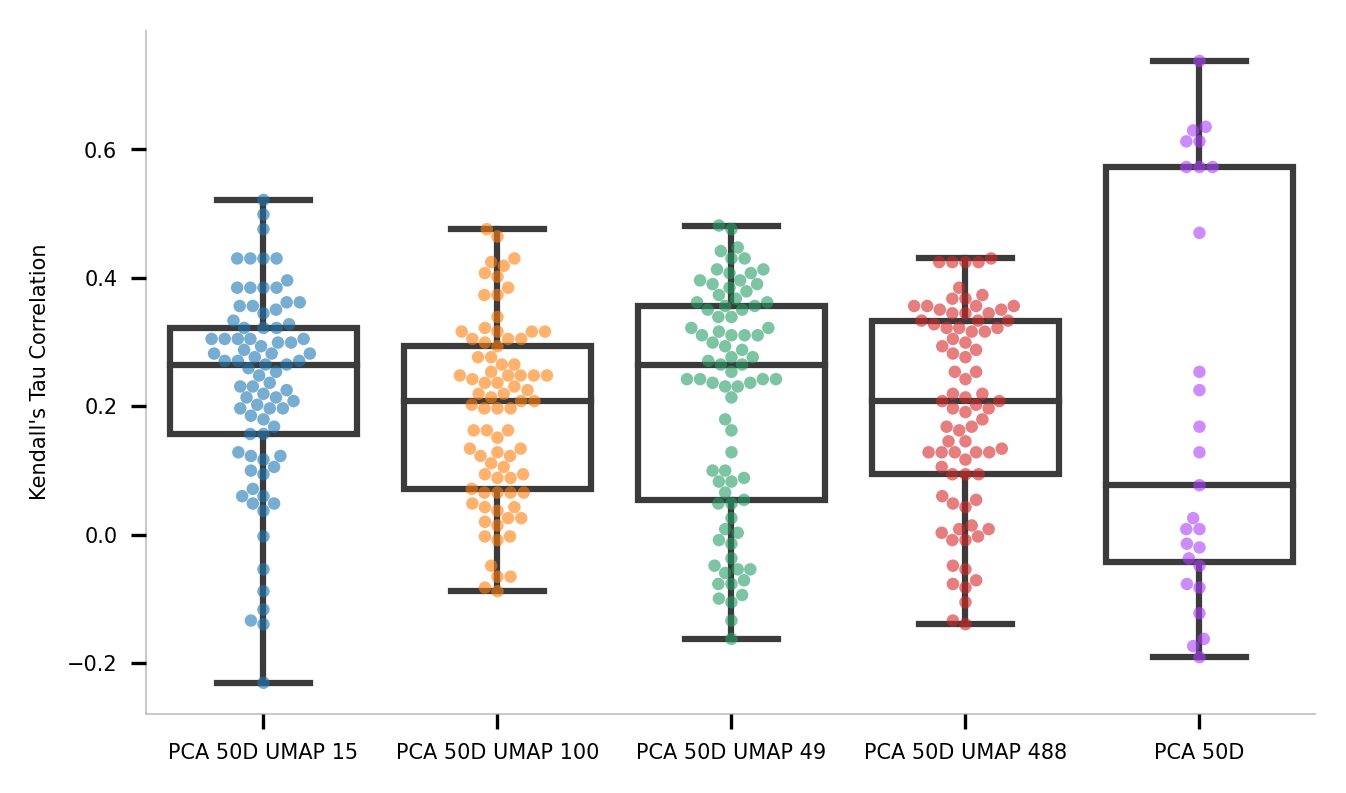

In [ ]:
plotNeigh(allNeigh,size=3,axisFontSize = 5,figsize=(5,3))

Check correlation of cell type neighbor rankings between all UMAP embeddings (with only neighbor parameter changed)

In [ ]:
from itertools import combinations

combos = list(combinations([1,2,3,4],2))+list(combinations([5,6,7,8],2))+list(combinations([9,10,11,12],2))

dfs = []
comparison = []
for d in combos:
  neigh = [getAllNeigh([latents[i] for i in d],[latentLab[i] for i in d],[latentType[i] for i in d],pseudo_copy.obs['type'])]
  dfs += neigh
  comparison += [latentLab[list(d)[0]]+'/'+latentLab[list(d)[1]]]*len(neigh[0])
d50 = pd.concat(dfs)
d50['Comparison'] = comparison
d50.head()

Latent       Tau                        Comparison
0  PCA 50D UMAP 100  0.732194  PCA 50D UMAP 15/PCA 50D UMAP 100
1  PCA 50D UMAP 100  0.715100  PCA 50D UMAP 15/PCA 50D UMAP 100
2  PCA 50D UMAP 100  0.618234  PCA 50D UMAP 15/PCA 50D UMAP 100
3  PCA 50D UMAP 100  0.635328  PCA 50D UMAP 15/PCA 50D UMAP 100
4  PCA 50D UMAP 100  0.641026  PCA 50D UMAP 15/PCA 50D UMAP 100

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


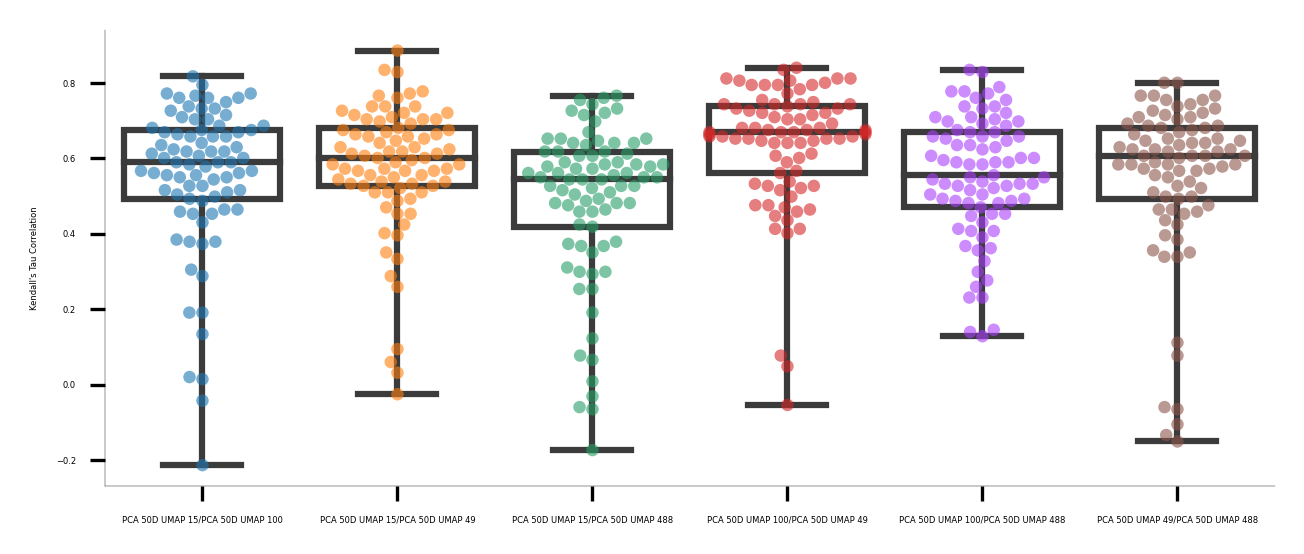

In [ ]:
plotNeigh(d50,size=3,axisFontSize = 2,figsize=(5,2),latent='Comparison')

In [ ]:
namesForCol = pd.unique(pseudo_copy.obs['type'])
palette = {}
for i in range(len(namesForCol)):
  palette[namesForCol[i]] = colors[i]


Plot UMAP embeddings

PCA 50D UMAP 15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 100


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 49


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 488


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


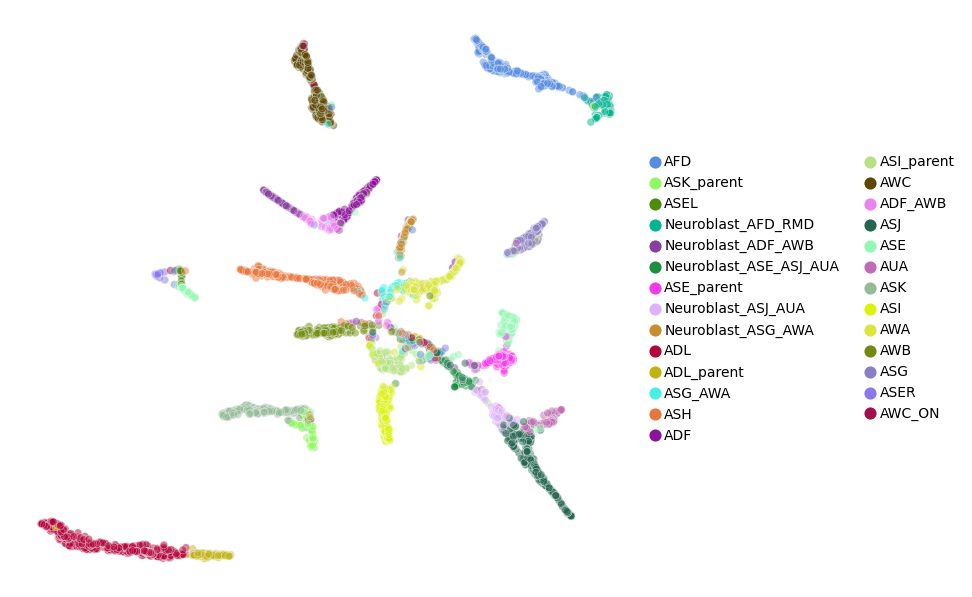

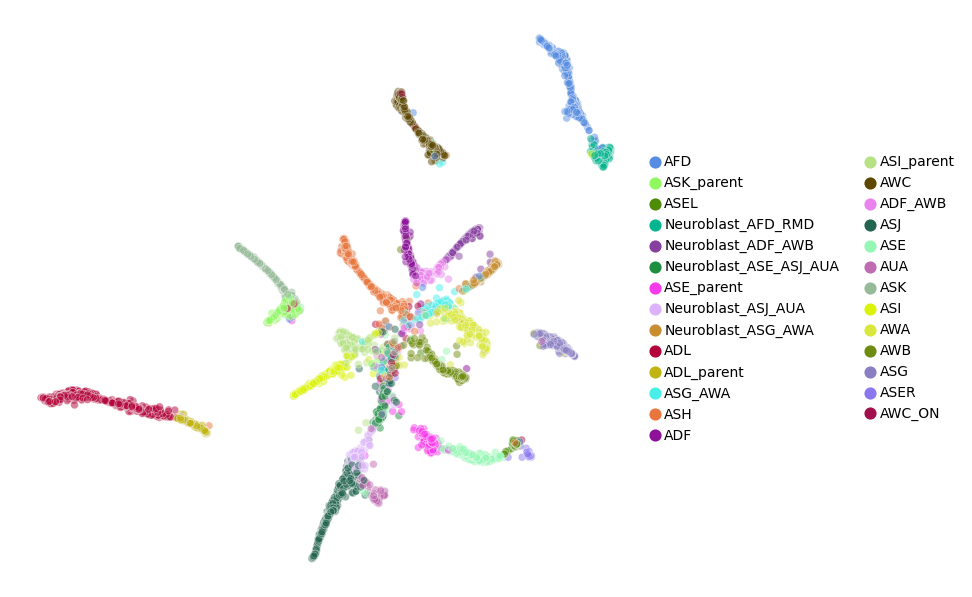

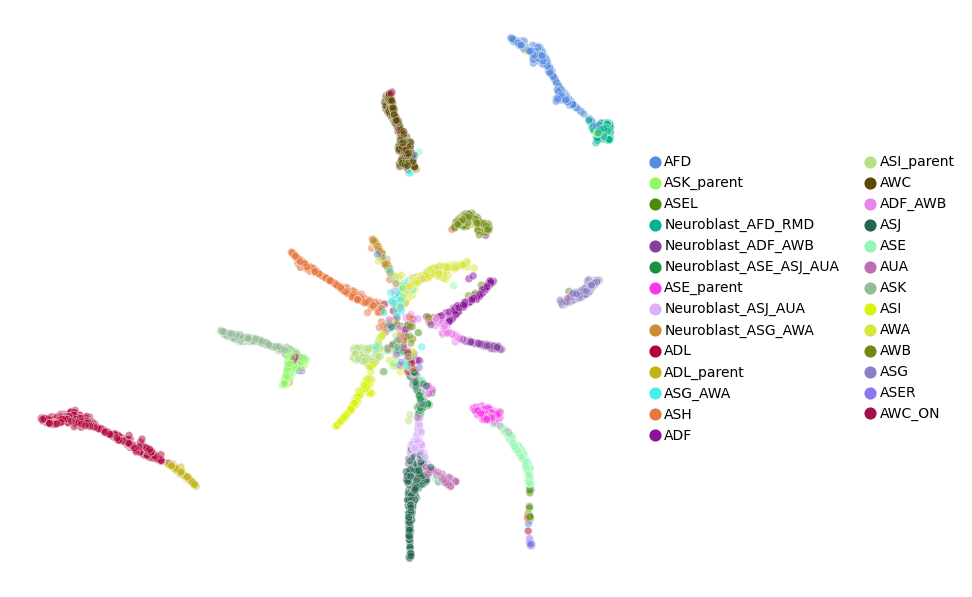

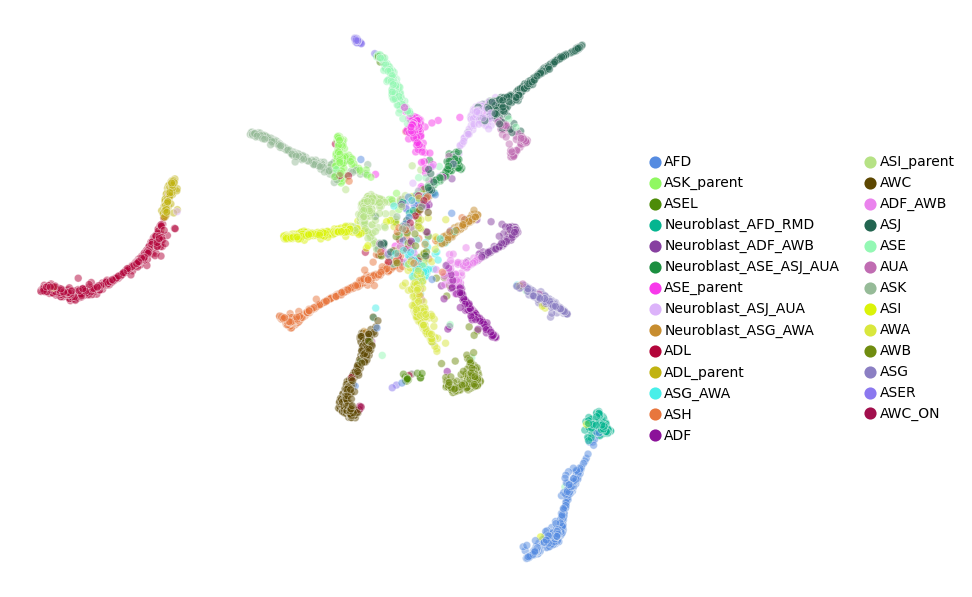

In [ ]:
for i in [1,2,3,4]:
  print(latentLab[i])
  obj_plot_embed(latents[i],pseudo_copy.obs['type'], fname = 'pseudo_'+str(latentLab[i])+'_UMAP.pdf', palette=palette,alpha= 0.5,figsize=(8,5))

Plot UMAPs after re-shuffling cells

In [ ]:
from sklearn.cluster import KMeans

PCA 50D UMAP 15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 100


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 49


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 488


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


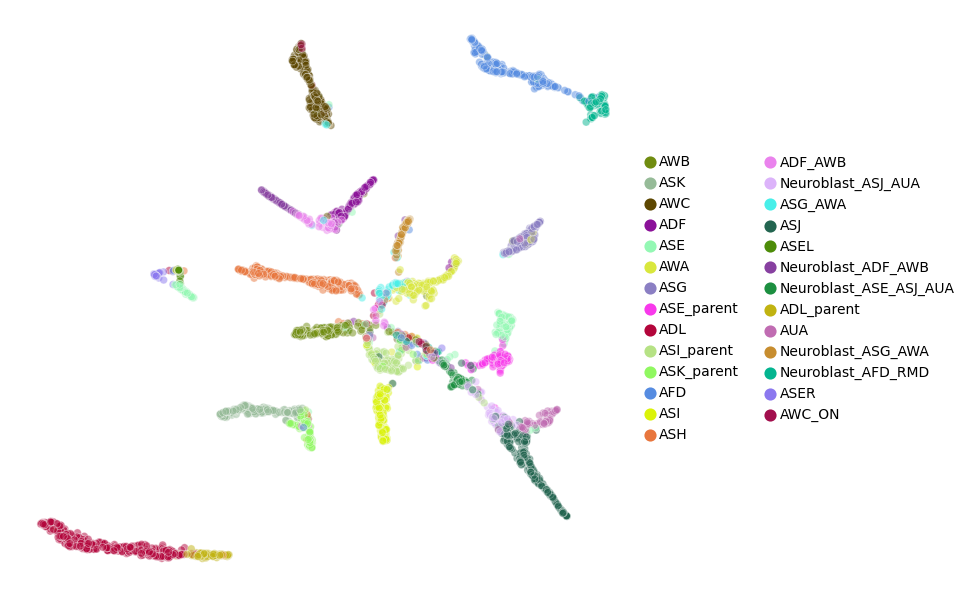

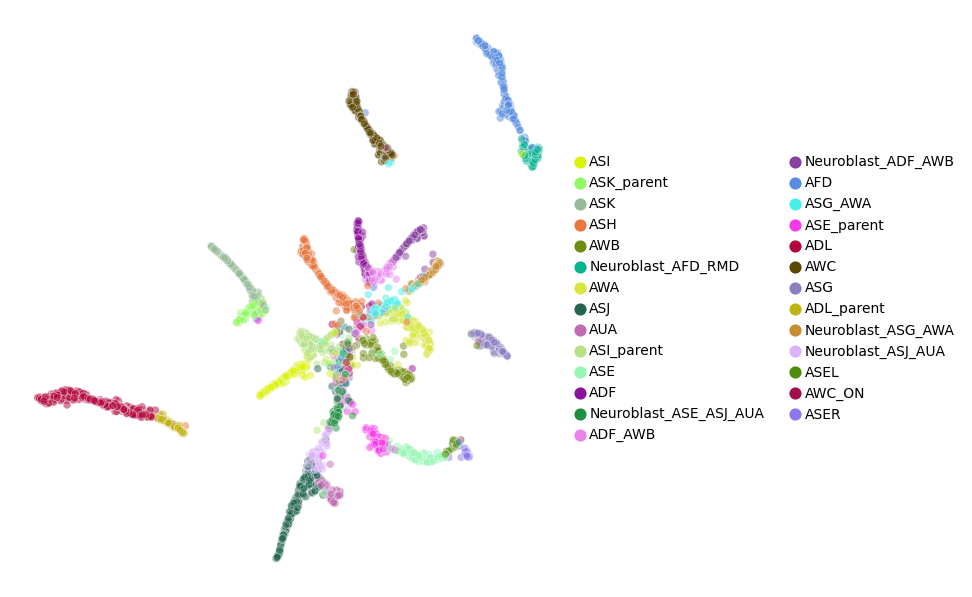

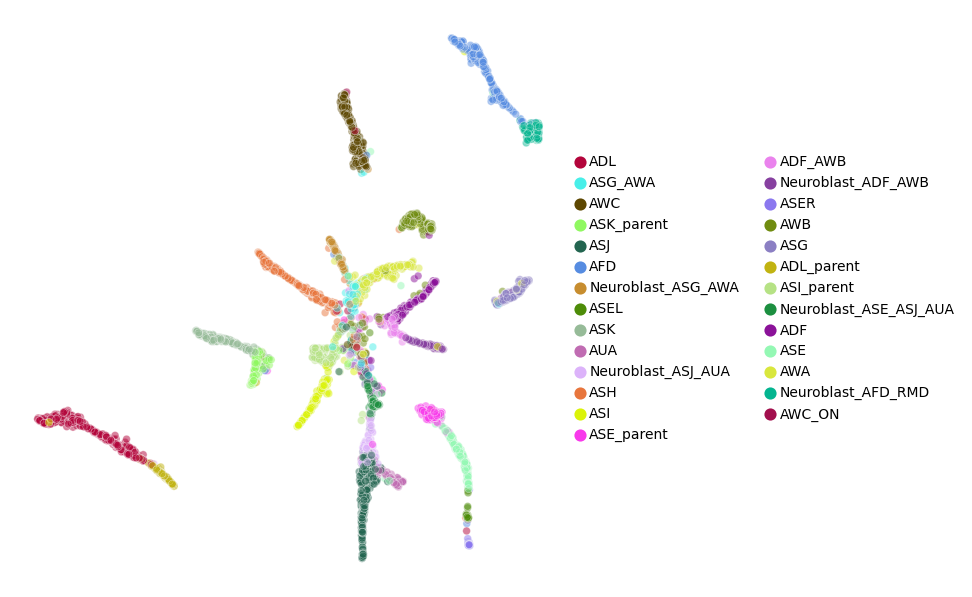

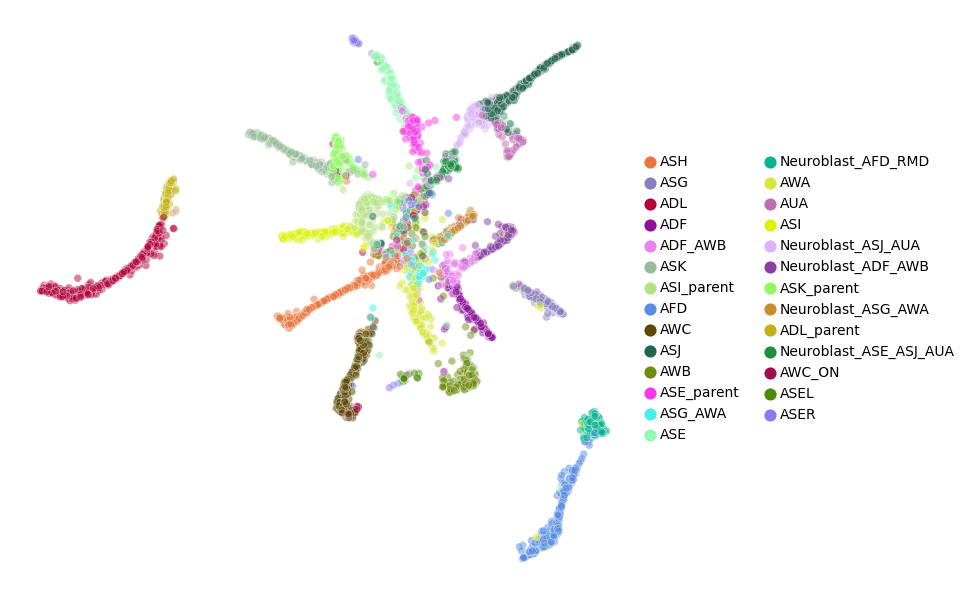

In [ ]:
#colorsFlip = [palette[i] for i in pd.unique(pseudo_copy.obs['type'][::-1])]

for i in [1,2,3,4]:
  print(latentLab[i])
  obj_plot_embed_flip(latents[i], pseudo_copy.obs['type'], fname = 'flip_pseudo_'+str(latentLab[i])+'_UMAP.pdf' , palette=palette,alpha= 0.5,figsize=(8,5))

Using k-means clusters plot covered cells on top

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

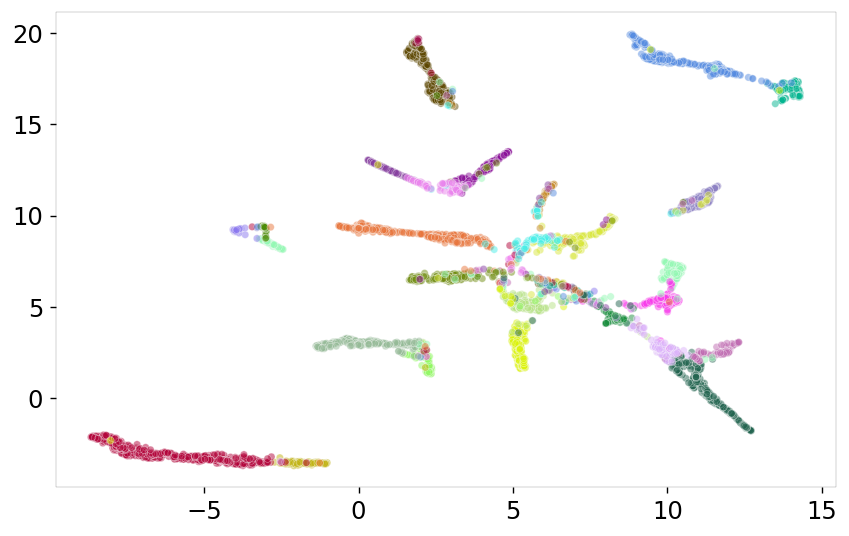

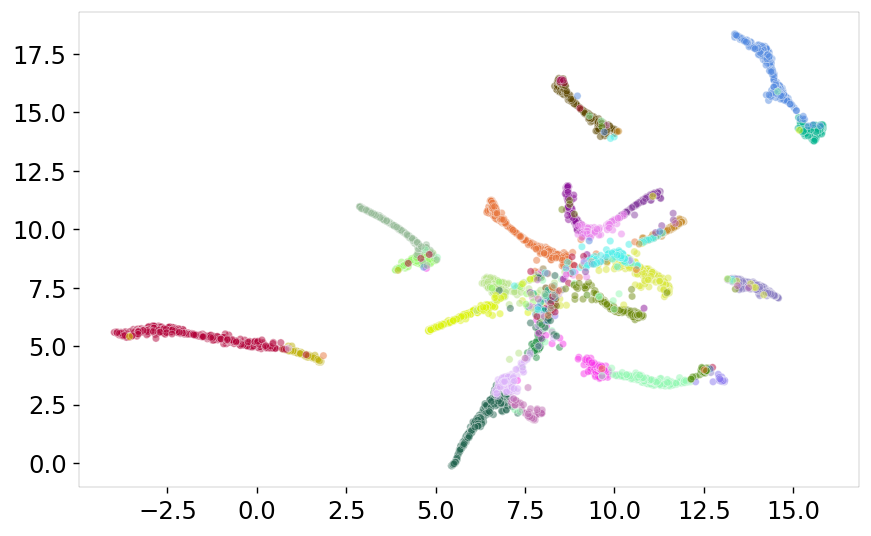

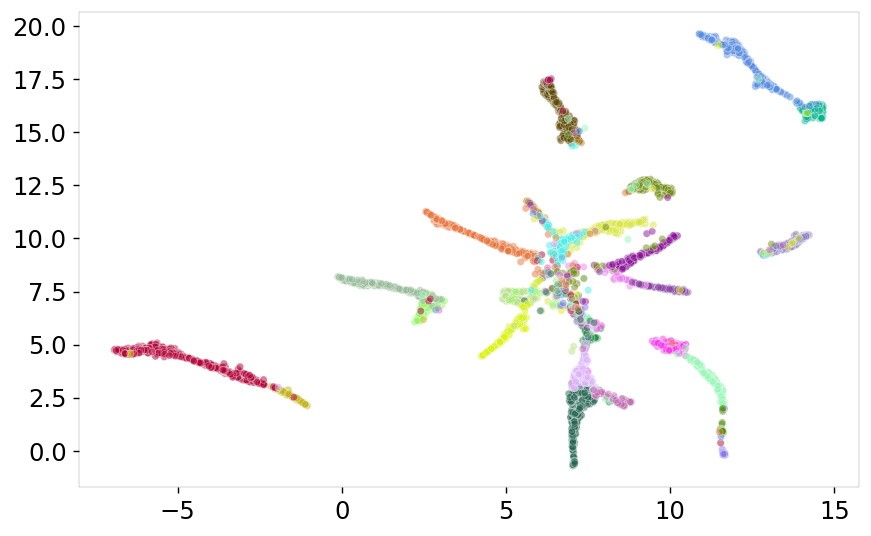

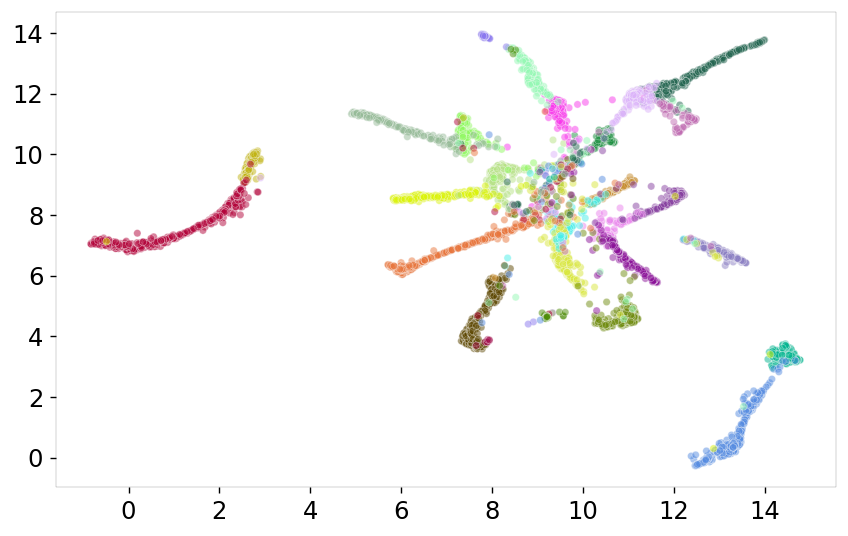

In [ ]:
allKmeansLabs = []
for i in [1,2,3,4]:
  kmeans_model_umap = KMeans(n_clusters=len(np.unique(pseudo_copy.obs['type'])), random_state=42).fit(latents[i])
  labelsUMAP = kmeans_model_umap.labels_
  allKmeansLabs += [labelsUMAP]

  plotOnTop(latents[i],palette,labelsUMAP,pseudo_copy.obs['type'], size=5,figsize=(8,5),fname = 'onTop_pseudo_'+str(latentLab[i])+'_UMAP.pdf')


  #plotOnTop(latents[i],palette,labelsUMAP,pseudo_copy.obs['type'], size=5)
  #vis.obj_plot_embed(latents[i], meta.smartseq_cluster, fname = '2DNCA.pdf', colors=clus_colors )

In [ ]:
len(allKmeansLabs)

4

Using k-means clusters plot majority cell type in each k-means cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.7882705826526274


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.796782522077271


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.7940721525155371


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.7884257866913654


Cluster  Fraction        Embedding
0                 AFD  0.524540  PCA 50D UMAP 15
1          ASK_parent  0.953333  PCA 50D UMAP 15
2                ASEL  0.921053  PCA 50D UMAP 15
3  Neuroblast_AFD_RMD  0.911565  PCA 50D UMAP 15
4  Neuroblast_ADF_AWB  0.938931  PCA 50D UMAP 15

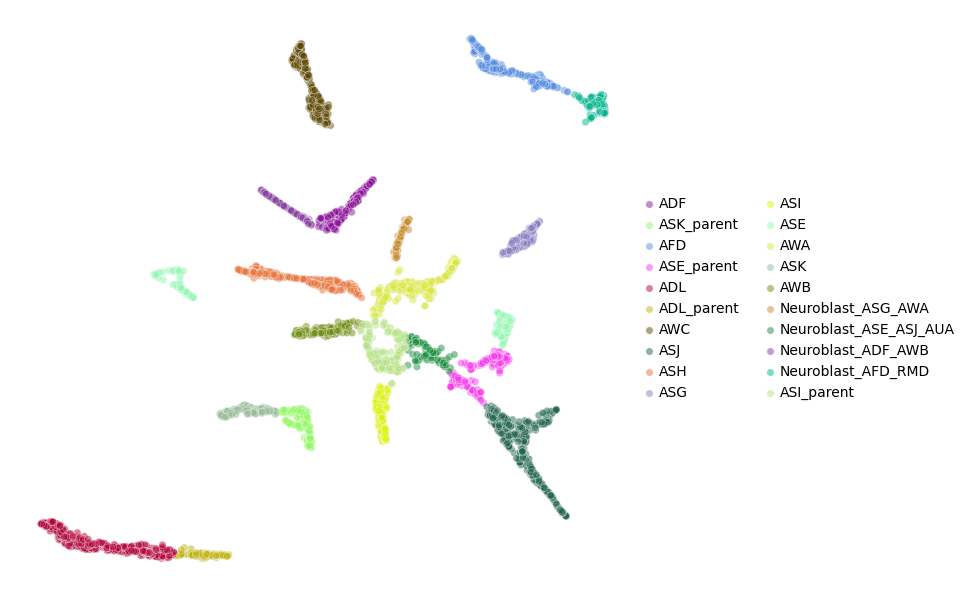

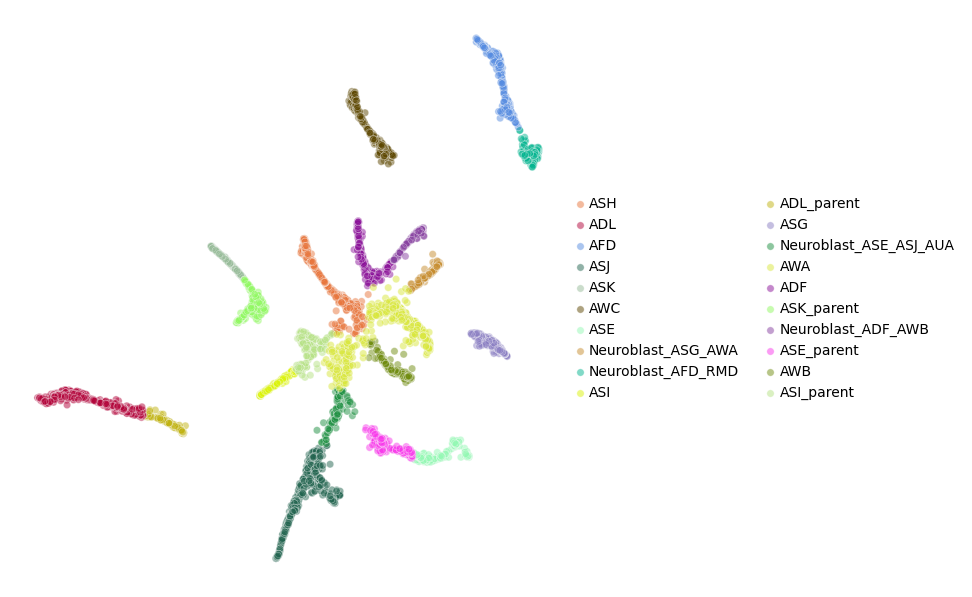

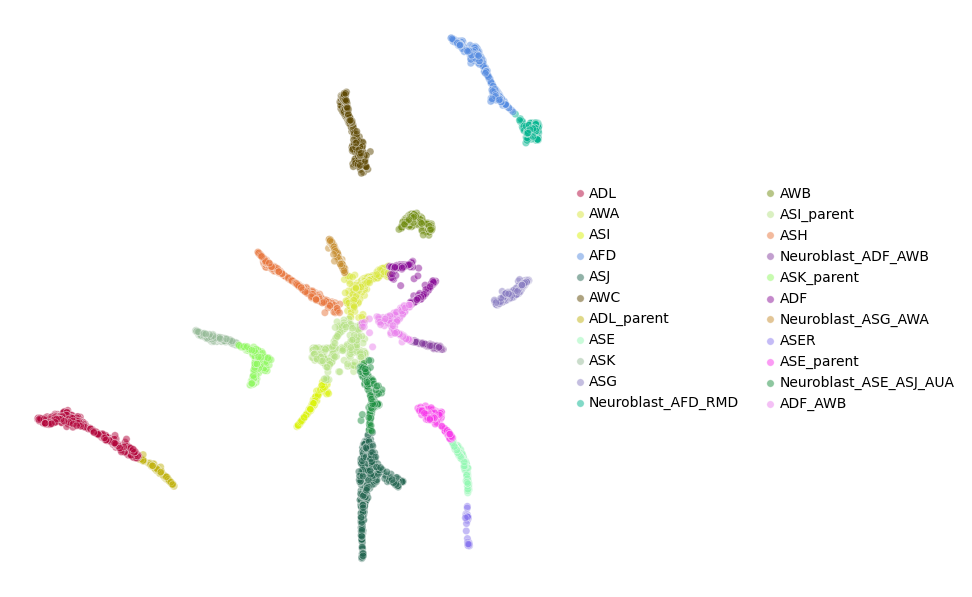

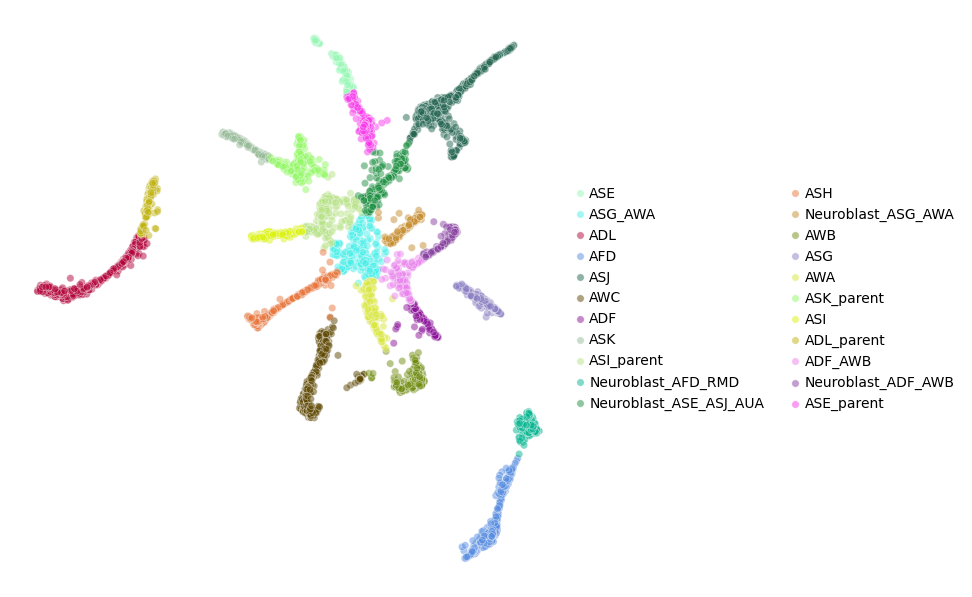

In [ ]:
#UMAP
df = []
for i in range(len(allKmeansLabs)):
  means = [getKMeans(allKmeansLabs[i],pseudo_copy.obs['type'],latentLab[i+1])]
  df += means
  plotKmeans(latents[i+1],palette,allKmeansLabs[i],pseudo_copy.obs['type'], size=5,figsize=(8,5),fname='kmeans_pseudo_'+str(latentLab[i])+'_UMAP.pdf')

  print(np.mean(means[0].Fraction))

dAll = pd.concat(df)
dAll.head()

In [ ]:
dAll

Cluster  Fraction         Embedding
0                  AFD  0.524540   PCA 50D UMAP 15
1           ASK_parent  0.953333   PCA 50D UMAP 15
2                 ASEL  0.921053   PCA 50D UMAP 15
3   Neuroblast_AFD_RMD  0.911565   PCA 50D UMAP 15
4   Neuroblast_ADF_AWB  0.938931   PCA 50D UMAP 15
..                 ...       ...               ...
22                 AWA  0.792373  PCA 50D UMAP 488
23                 AWB  0.882075  PCA 50D UMAP 488
24                 ASG  0.947977  PCA 50D UMAP 488
25                ASER  0.897436  PCA 50D UMAP 488
26              AWC_ON  0.777778  PCA 50D UMAP 488

[108 rows x 3 columns]

### **MERFISH data**

In [31]:
counts = anndata.read(data_path+'/counts.h5ad')
print(counts)

cellMeta = pd.read_csv(data_path+'/metadata.csv')
print(cellMeta.head())

AnnData object with n_obs × n_vars = 280327 × 254
     Unnamed: 0  fovID     fov_x     fov_y       volume     center_x  \
0  1.000010e+37     13  4539.310  2986.899   992.830060  4738.397298   
1  1.000020e+38    290 -4016.860  1404.780   610.091871 -3964.711404   
2  1.000070e+38    113   750.406  1143.102   148.277718   805.843523   
3  1.000070e+38    432  1262.680 -3752.030   249.515471  1348.686198   
4  1.000090e+38    354 -3627.450 -1987.730  1779.831996 -3584.650904   

      center_y         slice_id         sample_id     label     subclass  \
0  3075.327399   mouse2_slice31  dataset2_sample4   Astro_1   Astrocytes   
1  1451.889047  mouse2_slice160  dataset2_sample5      Endo  Endothelial   
2  1215.035473  mouse2_slice109  dataset2_sample6       SMC          SMC   
3 -3589.955255   mouse1_slice71  dataset1_sample2      Endo  Endothelial   
4 -1883.105955  mouse2_slice219  dataset2_sample5  L23_IT_3       L23_IT   

     class_label  
0          Other  
1          Other  
2  

In [32]:
choice = np.unique(cellMeta.slice_id)[7] #7
choice

'mouse1_slice162'

In [33]:
counts.obs['slice'] = pd.Categorical(cellMeta.slice_id)
counts.obs['type'] = pd.Categorical(cellMeta.subclass)
counts.obs['x'] = list(cellMeta.center_x)
counts.obs['y'] = list(cellMeta.center_y)

In [34]:
sub = counts[counts.obs['slice'].isin([choice])]
print(sub)

#colors = np.random.rand(len(sub.obs['type']),3)
nanLabs = np.array([[np.nan]*len(sub.obs['type'])])

labs = np.array([list(sub.obs['type'])])
labs_cont = np.array([list(sub.obs['x']),list(sub.obs['y'])])

View of AnnData object with n_obs × n_vars = 6963 × 254
    obs: 'slice', 'type', 'x', 'y'


In [35]:
np.unique(labs)

array(['Astrocytes', 'Endothelial', 'L23_IT', 'L45_IT', 'L56_NP', 'L5_IT',
       'L5_PT', 'L6_CT', 'L6_IT', 'L6_IT_Car3', 'L6b', 'Lamp5',
       'Microglia', 'OPC', 'Oligodendrocytes', 'PVM', 'Pericytes',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'Sst_Chodl', 'VLMC', 'Vip', 'other'],
      dtype='<U16')

In [36]:
#colors = np.random.rand(len(adata2.obs['Cluster']),3)
cdict = {'Microglia':'#A778BC','L6_IT':'#EA95C1','Astrocytes':'#B6657E','Oligodendrocytes':'#B49599',
         'L23_IT':'#628EA2','OPC':'#72B9A5','L45_IT':'#71B7A2','Endothelial':'#7794C3','Pvalb':'#FD8085',
         'L6_IT_Car3':'#FAD1FC','L56_NP':'#93B09B','PVM':'#ECBDD2','L5_IT':'#ABA8DF',
         'L5_PT':'#D36486','Sst':'#8FE0B1','L6_CT':'#9589C4','Vip':'#CD83AC','VLMC':'#BBDBF2',
         'SMC':'#7A849E','other':'#A382BC','L6b':'#64D7F0','Pericytes':'#95BA98',
         'Lamp5':'#A3E169','Sncg':'#92B1DB','Sst_Chodl':'#81FAC9'}
colors = [cdict[i] for i in pd.unique(sub.obs['type'])]

In [37]:
orig_mat = sub.X

In [38]:
log_mat = np.log1p(sub.X)

In [39]:
sc.pp.log1p(sub)

#Center scale
sc.pp.scale(sub, max_value=10)

scaled_mat = sub.X

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:343: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Generate UMAPs with different n_neighbors (15, 1%, 5%, 10%)

In [40]:
#Test neighbors = 15, 100, n/100, n/10
#Test neighbors = 15, n/100,n*.05, n/10
latents,latentLab,latentType = latentCompParams(scaled_mat, log_mat, ndims=2, neigh=[5,30,50,int(np.round(log_mat.shape[0]/100)),int(np.round(log_mat.shape[0]*.05)),int(np.round(log_mat.shape[0]/10))], rounds = 3)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [41]:
latentLab

['Ambient',
 'PCA 50D UMAP 5',
 'PCA 50D UMAP 30',
 'PCA 50D UMAP 50',
 'PCA 50D UMAP 70',
 'PCA 50D UMAP 348',
 'PCA 50D UMAP 696',
 'PCA 50D UMAP 5',
 'PCA 50D UMAP 30',
 'PCA 50D UMAP 50',
 'PCA 50D UMAP 70',
 'PCA 50D UMAP 348',
 'PCA 50D UMAP 696',
 'PCA 50D UMAP 5',
 'PCA 50D UMAP 30',
 'PCA 50D UMAP 50',
 'PCA 50D UMAP 70',
 'PCA 50D UMAP 348',
 'PCA 50D UMAP 696',
 'PCA 50D']

Get correlations of cell type neighbor rankings between embeddings and ambient space

In [42]:
allNeigh = getAllNeigh(latents,latentLab,latentType,sub.obs['type'])
allNeigh.head()

Latent       Tau
0  PCA 50D UMAP 5  0.440000
1  PCA 50D UMAP 5  0.486667
2  PCA 50D UMAP 5  0.406667
3  PCA 50D UMAP 5  0.366667
4  PCA 50D UMAP 5  0.133333

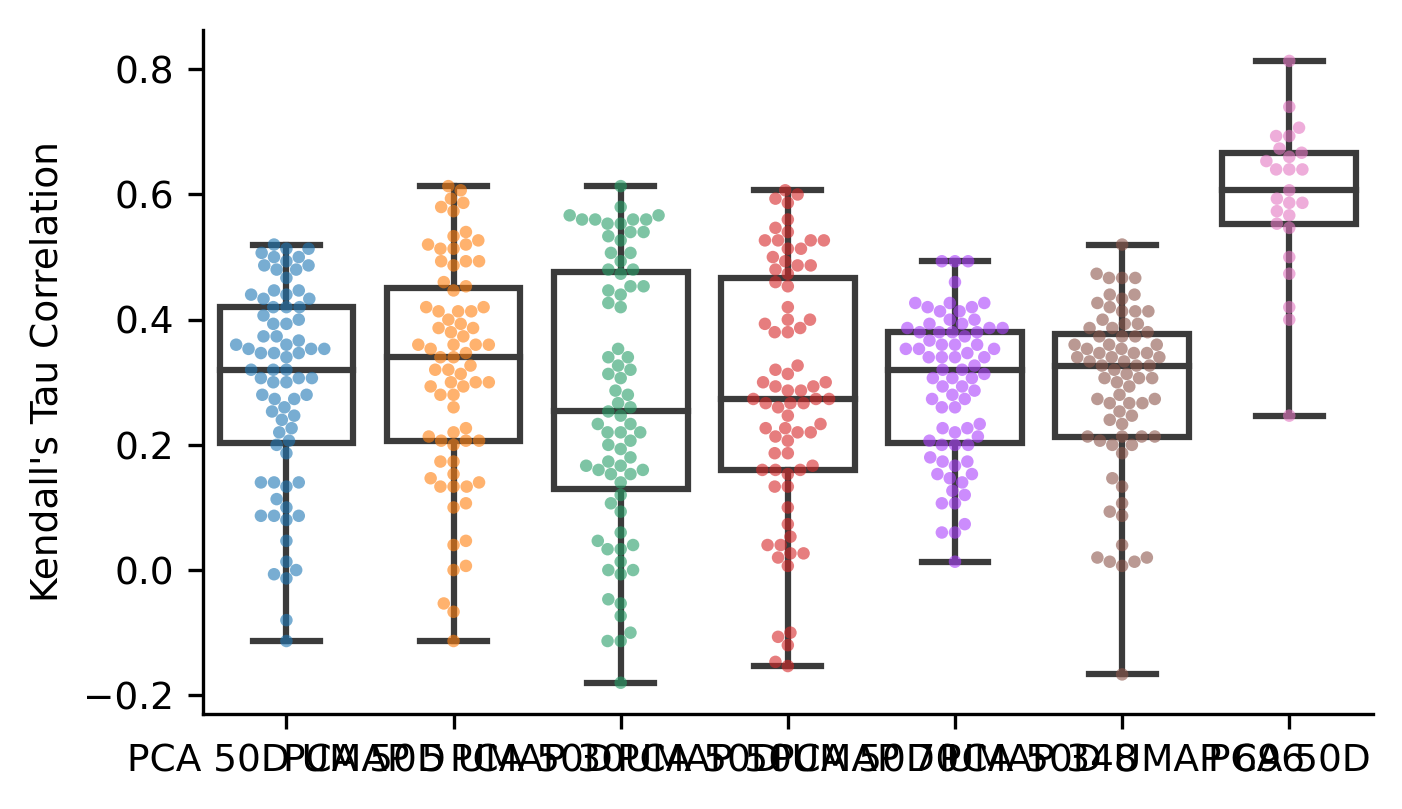

In [44]:
plotNeigh(allNeigh,size=3,axisFontSize = 9,figsize=(5,3))

Get correlations of cell type neighbor rankings between UMAPs (with this one parameter difference)

In [52]:
from itertools import combinations

combos = list(combinations([1,2,3,4,5,6],2))+list(combinations([7,8,9,10,11,12],2))+list(combinations([13,14,15,16,17,18],2))

dfs = []
comparison = []
for d in combos:
  neigh = [getAllNeigh([latents[i] for i in d],[latentLab[i] for i in d],[latentType[i] for i in d],sub.obs['type'])]
  dfs += neigh
  comparison += [latentLab[list(d)[0]]+'/'+latentLab[list(d)[1]]]*len(neigh[0])
d50 = pd.concat(dfs)
d50['Comparison'] = comparison
d50.head()

Latent       Tau                      Comparison
0  PCA 50D UMAP 30  0.326667  PCA 50D UMAP 5/PCA 50D UMAP 30
1  PCA 50D UMAP 30  0.633333  PCA 50D UMAP 5/PCA 50D UMAP 30
2  PCA 50D UMAP 30  0.393333  PCA 50D UMAP 5/PCA 50D UMAP 30
3  PCA 50D UMAP 30  0.673333  PCA 50D UMAP 5/PCA 50D UMAP 30
4  PCA 50D UMAP 30  0.166667  PCA 50D UMAP 5/PCA 50D UMAP 30

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; y

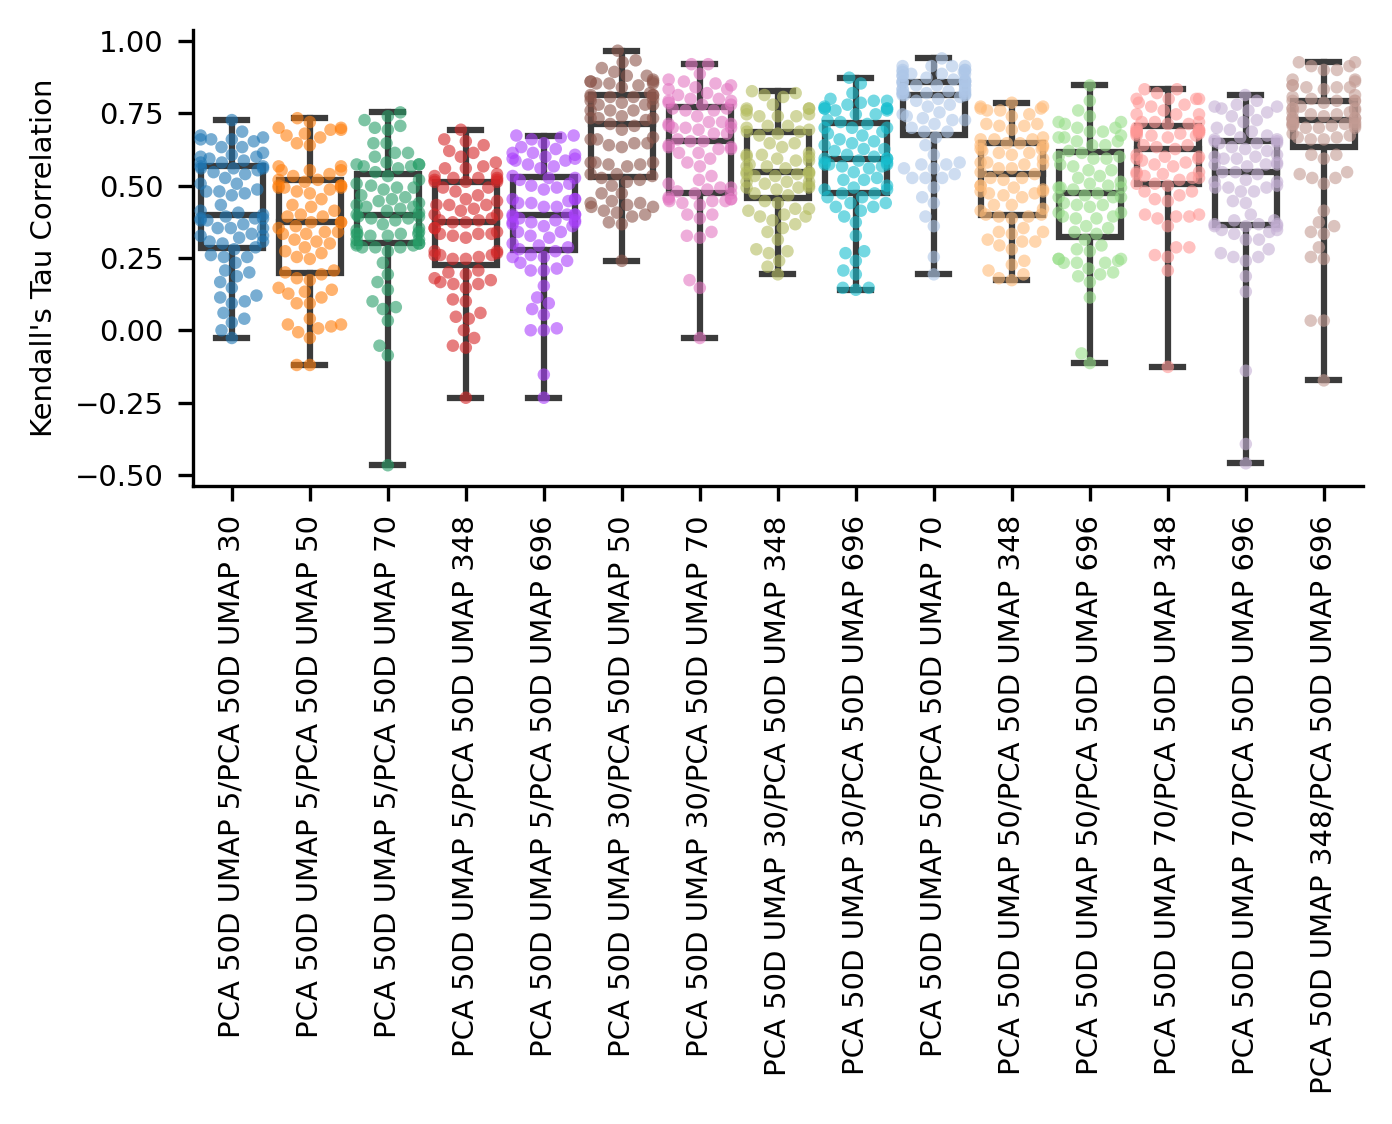

In [53]:
plotNeigh(d50,size=3,axisFontSize = 7,figsize=(5,2),latent='Comparison',rot=True)

In [47]:
namesForCol = pd.unique(sub.obs['type'])
palette = {}
for i in range(len(namesForCol)):
  palette[namesForCol[i]] = colors[i]


Plot UMAPs

PCA 50D UMAP 5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 70


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 348


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 696


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


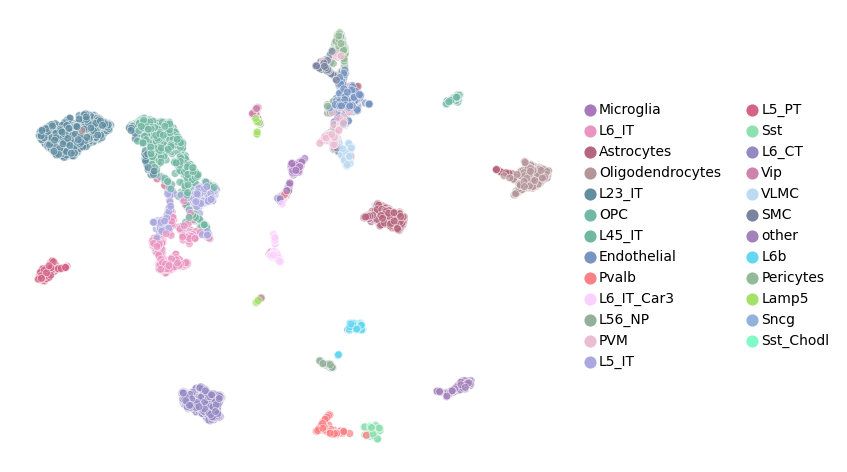

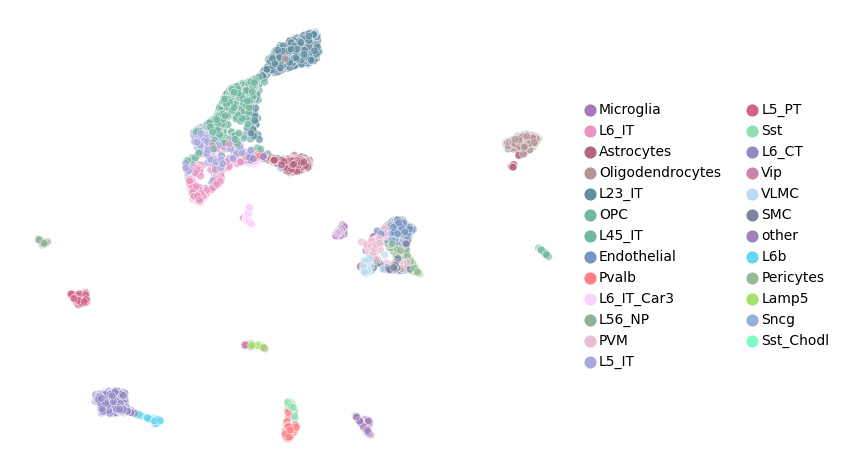

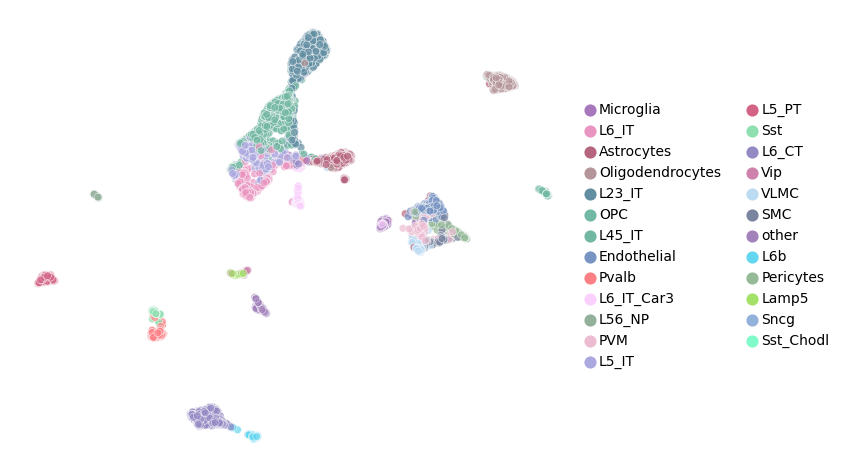

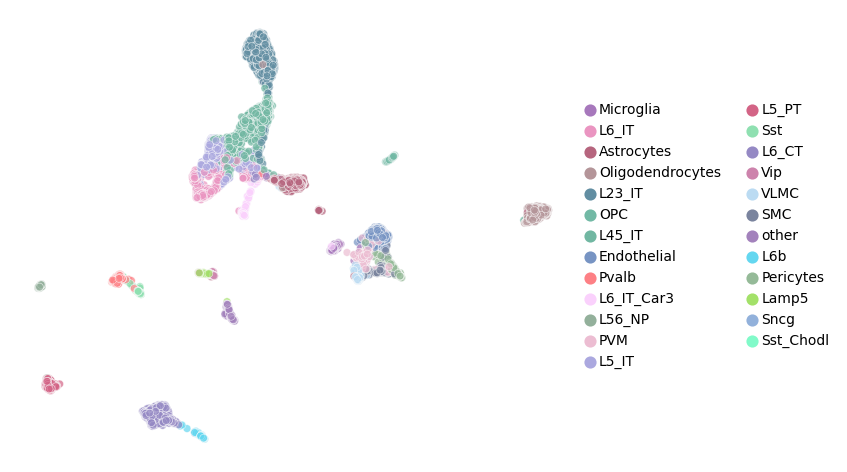

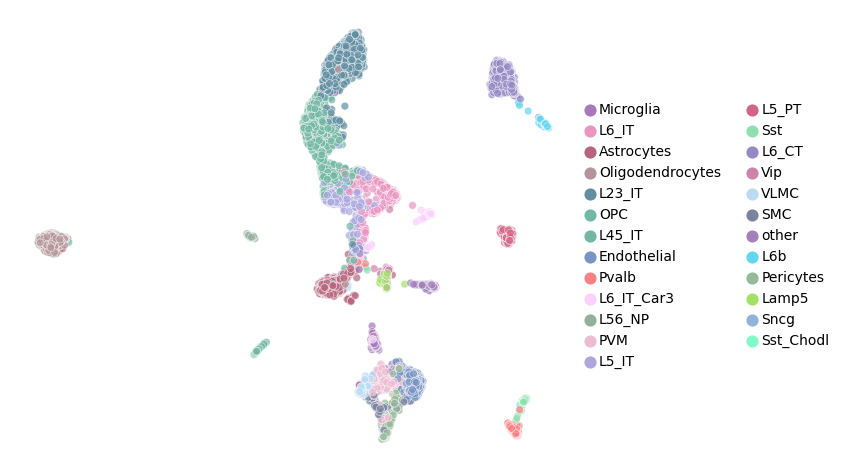

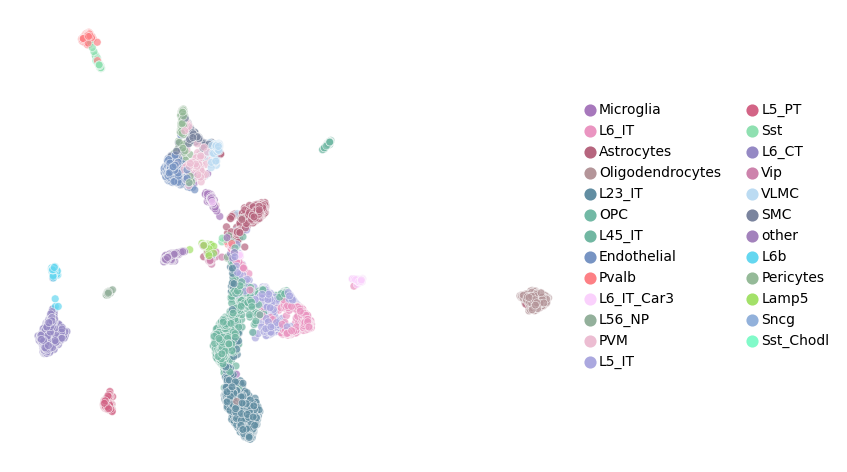

In [58]:
for i in [1,2,3,4,5,6]:
  print(latentLab[i])
  obj_plot_embed(latents[i], sub.obs['type'], fname = 'merfish_'+str(i)+'_'+str(latentLab[i])+'_UMAP.pdf' , palette=palette,alpha= 0.7,figsize=(7,4))

PCA 50D UMAP 5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 70


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 348


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 696


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


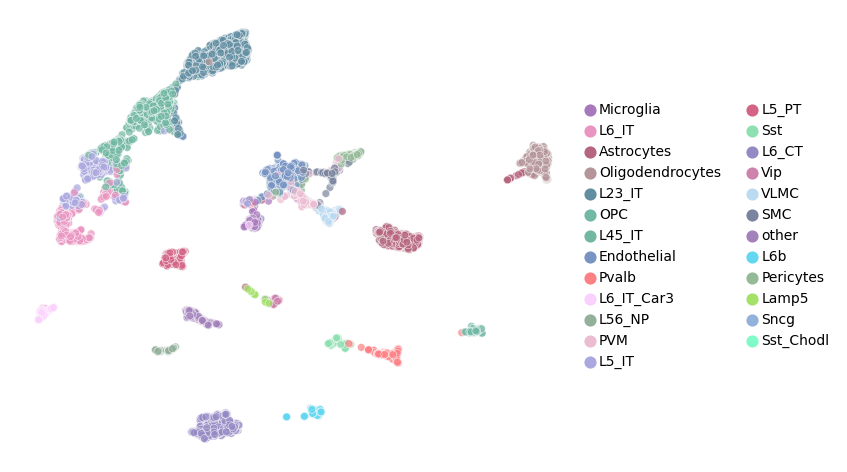

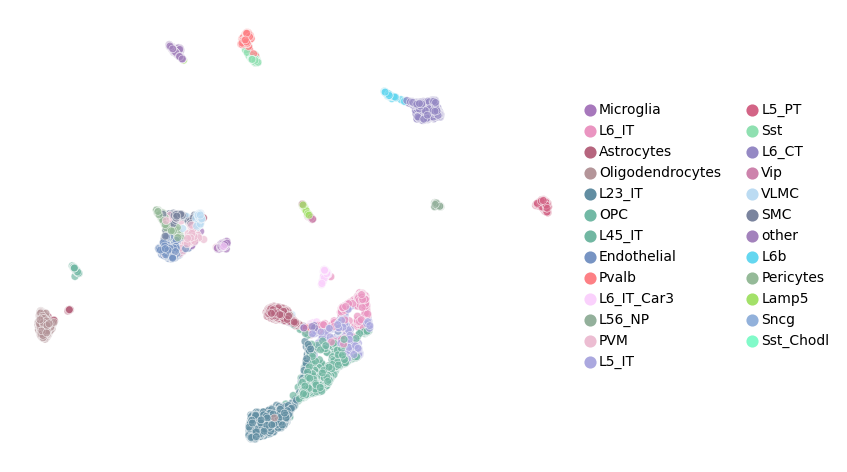

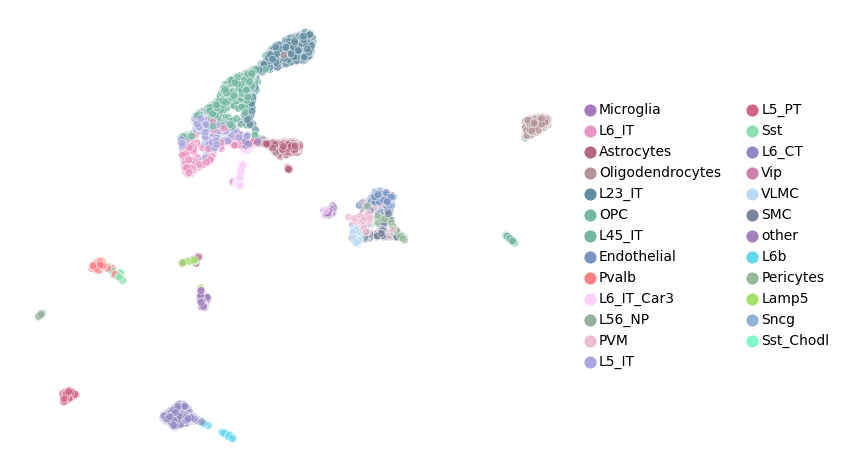

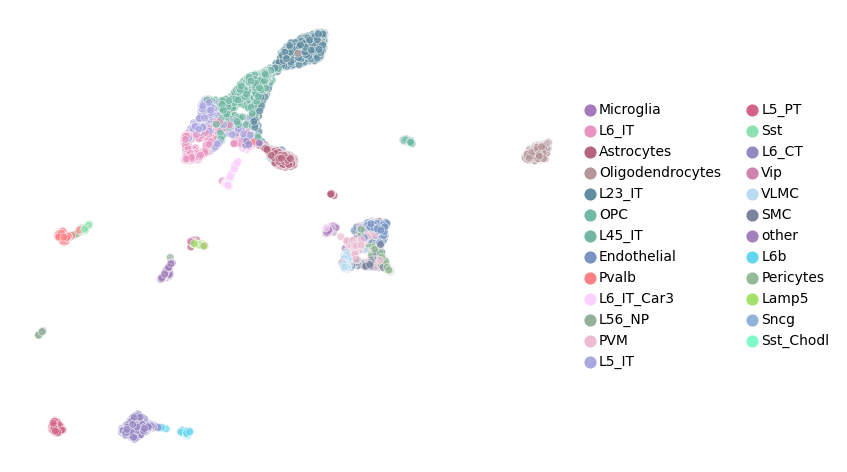

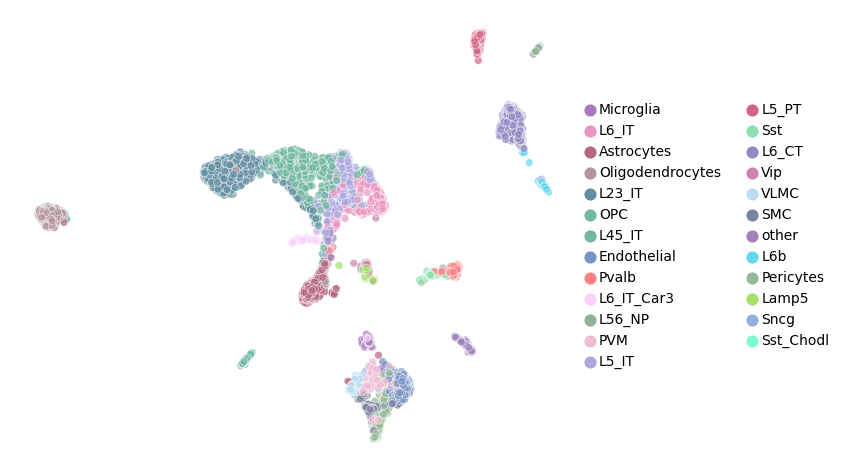

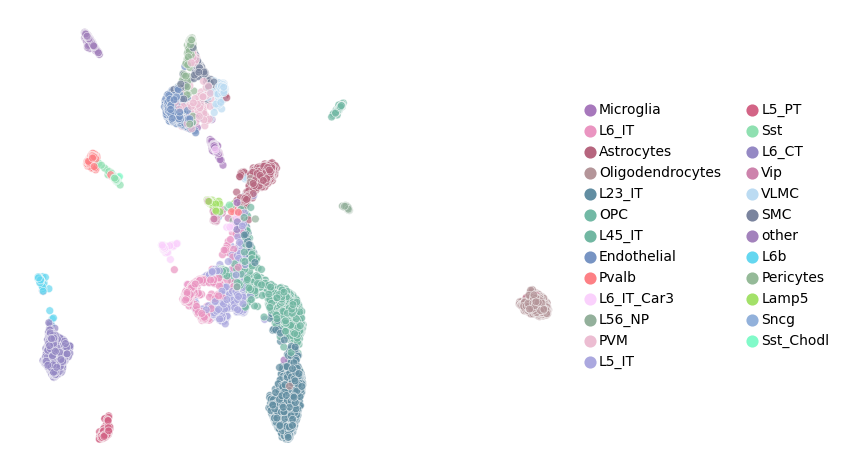

In [57]:
for i in [7,8,9,10,11,12]:
  print(latentLab[i])
  obj_plot_embed(latents[i], sub.obs['type'], fname = 'merfish_'+str(i)+'_'+str(latentLab[i])+'_UMAP.pdf' , palette=palette,alpha= 0.7,figsize=(7,4))

Randomly shuffle cells and re-plot

In [ ]:
from sklearn.cluster import KMeans

PCA 50D UMAP 15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 70


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 348


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 696


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


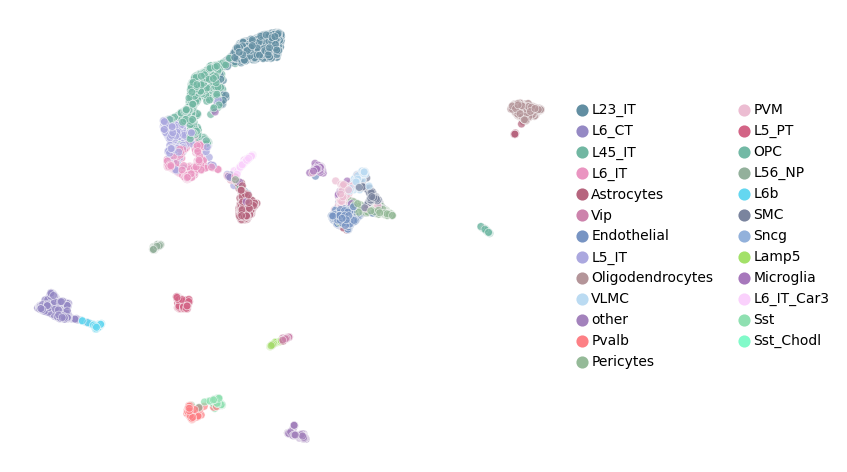

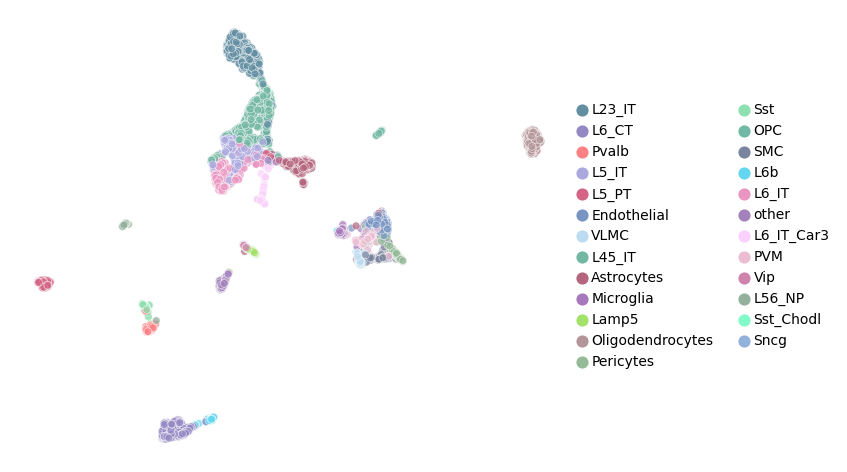

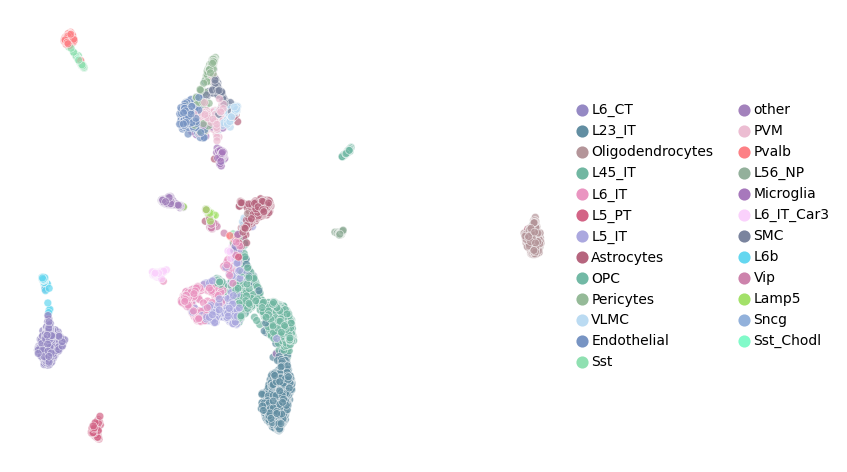

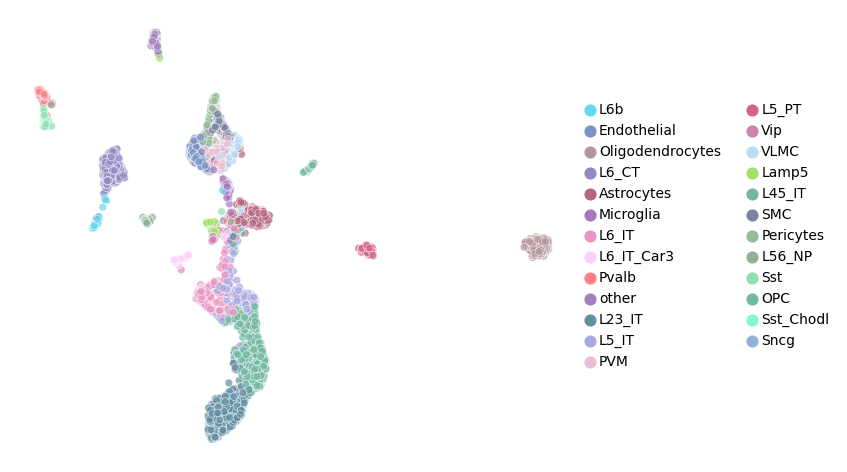

In [ ]:
#colorsFlip = [palette[i] for i in pd.unique(sub.obs['type'][::-1])]

for i in [1,2,3,4]:
  print(latentLab[i])
  obj_plot_embed_flip(latents[i], sub.obs['type'], fname = 'flip_merfish_'+str(latentLab[i])+'_UMAP.pdf' ,palette=palette,alpha= 0.7,figsize=(7,4))
    

Using k-means clusters of cells plot covered cells on top

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

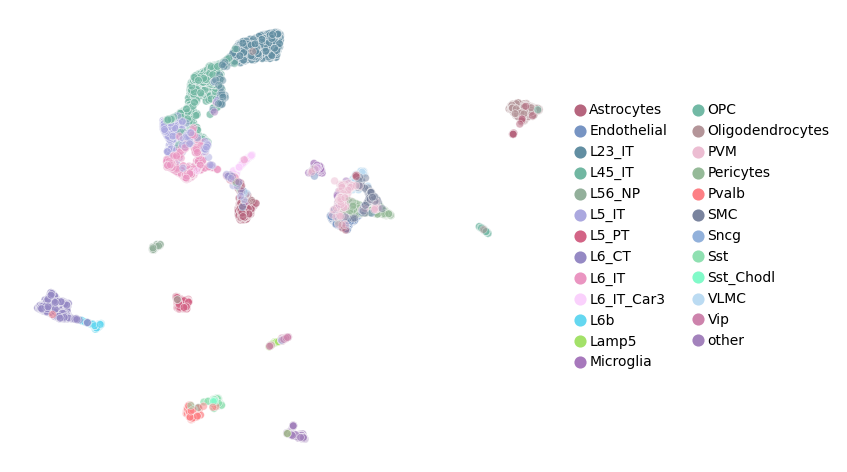

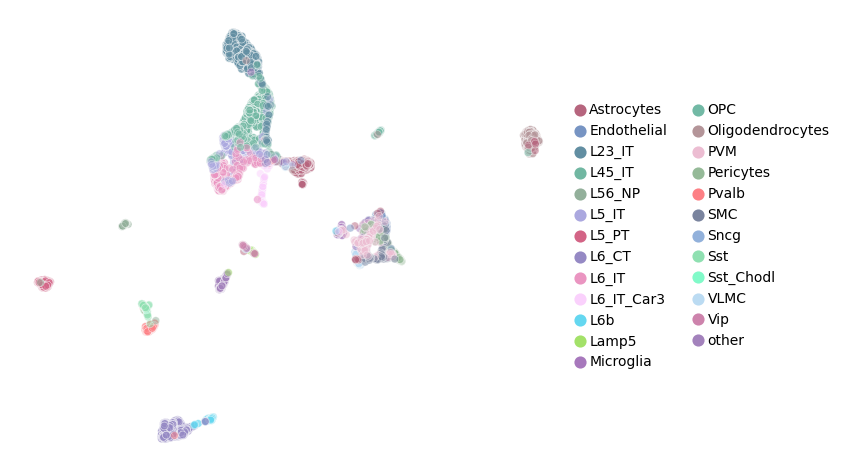

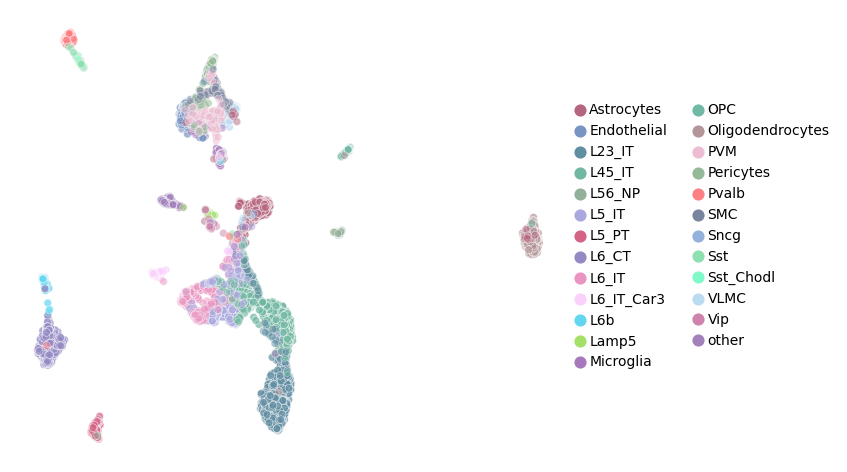

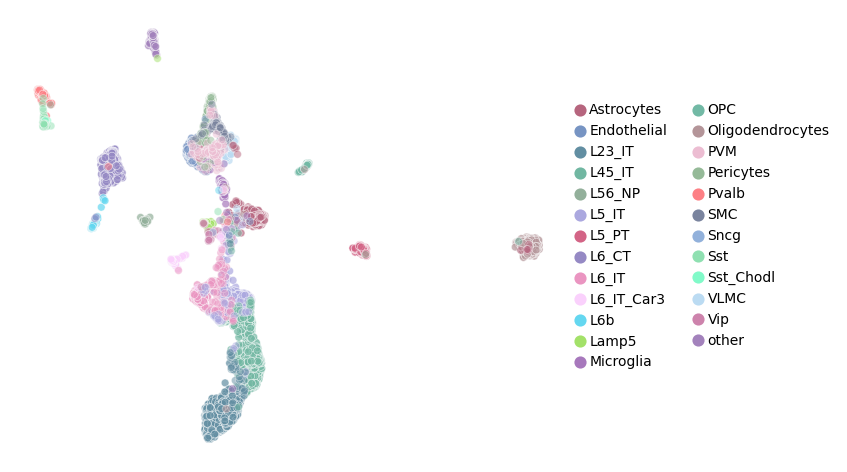

In [ ]:
allKmeansLabs = []
for i in [1,2,3,4]:
  kmeans_model_umap = KMeans(n_clusters=len(np.unique(sub.obs['type'])), random_state=42).fit(latents[i])
  labelsUMAP = kmeans_model_umap.labels_
  allKmeansLabs += [labelsUMAP]

  plotOnTop(latents[i],palette,labelsUMAP,sub.obs['type'], size=20,figsize=(7,4),fname = 'onTop_merfish_'+str(latentLab[i])+'_UMAP.pdf',alpha=0.7)


  #plotOnTop(latents[i],palette,labelsUMAP,sub.obs['type'], size=5)
  #vis.obj_plot_embed(latents[i], meta.smartseq_cluster, fname = '2DNCA.pdf', colors=clus_colors )

In [ ]:
len(allKmeansLabs)

4

Using k-means clusters plot the majority cell type in each k-means cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.8718021315024559


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.8490629952020576


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.8502737064802818


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

0.856715277397408


Cluster  Fraction        Embedding
0         Microglia  0.901099  PCA 50D UMAP 15
1             L6_IT  0.560364  PCA 50D UMAP 15
2        Astrocytes  0.937729  PCA 50D UMAP 15
3  Oligodendrocytes  0.984674  PCA 50D UMAP 15
4            L23_IT  0.557082  PCA 50D UMAP 15

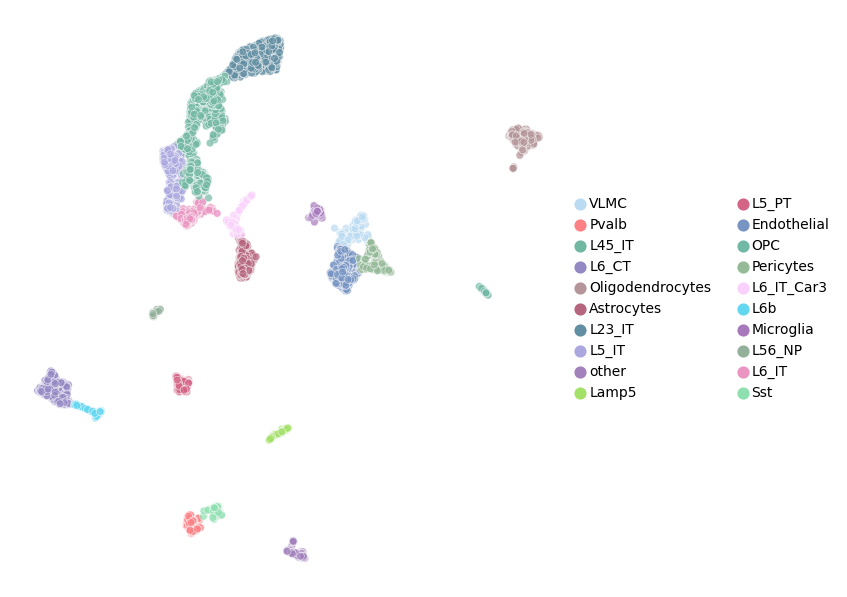

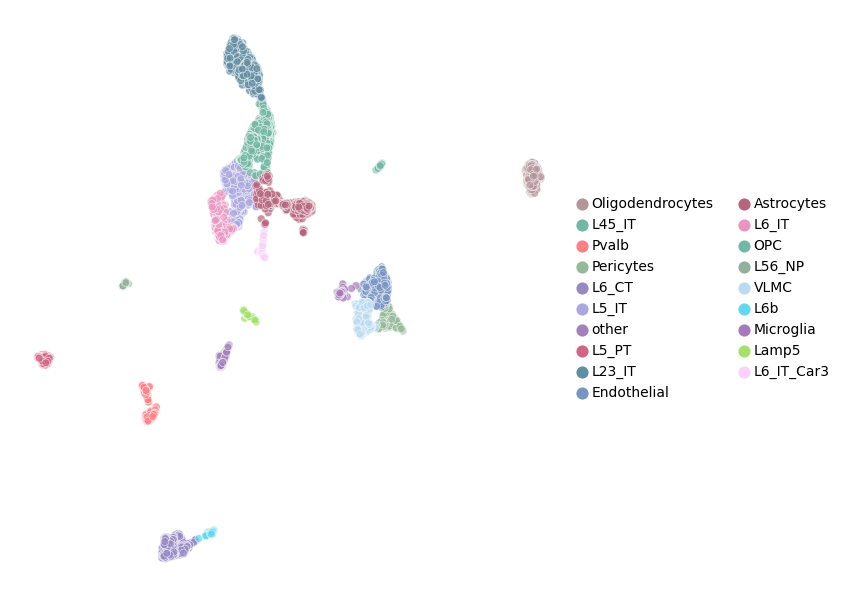

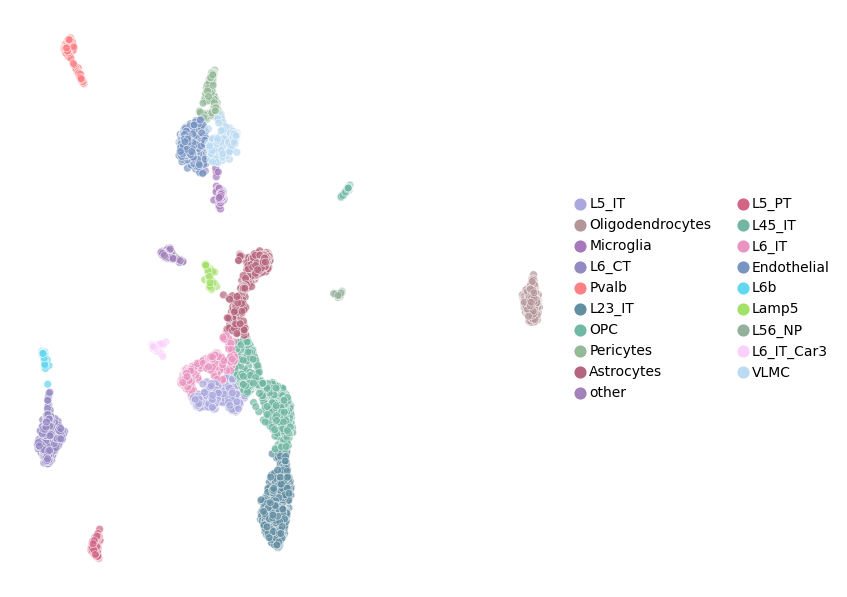

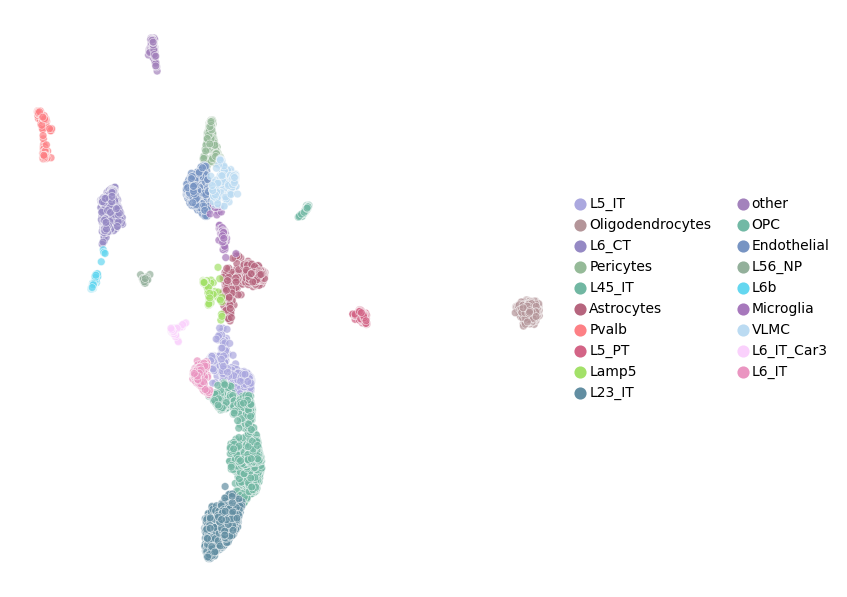

In [ ]:
#UMAP
df = []
pos = 1
for i in range(len(allKmeansLabs)):
  means = [getKMeans(allKmeansLabs[i],sub.obs['type'],latentLab[i+pos])]
  df += means
  plotKmeans(latents[i+pos],palette,allKmeansLabs[i],sub.obs['type'], size=20,figsize=(7,5),fname='kmeans_merfish_'+str(latentLab[pos+i])+'_UMAP.pdf',alpha=0.7)

  print(np.mean(means[0].Fraction))

dAll = pd.concat(df)
dAll.head()

In [ ]:
dAll[dAll.Embedding.isin(['PCA 50D UMAP 696','PCA 50D UMAP 70'])]

Cluster  Fraction         Embedding
0          Microglia  0.895604   PCA 50D UMAP 70
1              L6_IT  0.528474   PCA 50D UMAP 70
2         Astrocytes  0.827839   PCA 50D UMAP 70
3   Oligodendrocytes  0.984674   PCA 50D UMAP 70
4             L23_IT  0.568710   PCA 50D UMAP 70
5                OPC  0.992366   PCA 50D UMAP 70
6             L45_IT  0.516888   PCA 50D UMAP 70
7        Endothelial  0.992079   PCA 50D UMAP 70
8              Pvalb  0.952096   PCA 50D UMAP 70
9         L6_IT_Car3  0.926829   PCA 50D UMAP 70
10            L56_NP  0.948718   PCA 50D UMAP 70
11               PVM  0.487805   PCA 50D UMAP 70
12             L5_IT  0.530612   PCA 50D UMAP 70
13             L5_PT  0.972973   PCA 50D UMAP 70
14               Sst  0.967391   PCA 50D UMAP 70
15             L6_CT  0.984536   PCA 50D UMAP 70
16               Vip  0.981132   PCA 50D UMAP 70
17              VLMC  0.985612   PCA 50D UMAP 70
18               SMC  0.764706   PCA 50D UMAP 70
19             other  1.000000   PCA 50D UMAP 70
20               L6b  1.000000   PCA 50D UMAP 70
21         Pericytes  0.856410   PCA 50D UMAP 70
22             Lamp5  0.983051   PCA 50D UMAP 70
23              Sncg  1.000000   PCA 50D UMAP 70
24         Sst_Chodl  1.000000   PCA 50D UMAP 70
0          Microglia  0.901099  PCA 50D UMAP 696
1              L6_IT  0.526196  PCA 50D UMAP 696
2         Astrocytes  0.842491  PCA 50D UMAP 696
3   Oligodendrocytes  0.982759  PCA 50D UMAP 696
4             L23_IT  0.564482  PCA 50D UMAP 696
5                OPC  0.984733  PCA 50D UMAP 696
6             L45_IT  0.586489  PCA 50D UMAP 696
7        Endothelial  0.990099  PCA 50D UMAP 696
8              Pvalb  0.952096  PCA 50D UMAP 696
9         L6_IT_Car3  0.878049  PCA 50D UMAP 696
10            L56_NP  0.948718  PCA 50D UMAP 696
11               PVM  0.542683  PCA 50D UMAP 696
12             L5_IT  0.521542  PCA 50D UMAP 696
13             L5_PT  0.967568  PCA 50D UMAP 696
14               Sst  0.934783  PCA 50D UMAP 696
15             L6_CT  0.986254  PCA 50D UMAP 696
16               Vip  0.962264  PCA 50D UMAP 696
17              VLMC  0.964029  PCA 50D UMAP 696
18               SMC  0.672269  PCA 50D UMAP 696
19             other  1.000000  PCA 50D UMAP 696
20               L6b  1.000000  PCA 50D UMAP 696
21         Pericytes  0.830769  PCA 50D UMAP 696
22             Lamp5  0.983051  PCA 50D UMAP 696
23              Sncg  1.000000  PCA 50D UMAP 696
24         Sst_Chodl  1.000000  PCA 50D UMAP 696

In [49]:
from google.colab import files

In [ ]:
!zip pseudo.zip *pseudo*.pdf

updating: flip_pseudo_PCA 50D UMAP 100_UMAP.pdf (deflated 4%)
updating: flip_pseudo_PCA 50D UMAP 15_UMAP.pdf (deflated 4%)
updating: flip_pseudo_PCA 50D UMAP 488_UMAP.pdf (deflated 4%)
updating: flip_pseudo_PCA 50D UMAP 49_UMAP.pdf (deflated 4%)
updating: kmeans_pseudo_Ambient_UMAP.pdf (deflated 4%)
updating: kmeans_pseudo_PCA 50D UMAP 100_UMAP.pdf (deflated 4%)
updating: kmeans_pseudo_PCA 50D UMAP 15_UMAP.pdf (deflated 4%)
updating: kmeans_pseudo_PCA 50D UMAP 49_UMAP.pdf (deflated 5%)
updating: onTop_pseudo_PCA 50D UMAP 100_UMAP.pdf (deflated 4%)
updating: onTop_pseudo_PCA 50D UMAP 15_UMAP.pdf (deflated 4%)
updating: onTop_pseudo_PCA 50D UMAP 488_UMAP.pdf (deflated 4%)
updating: onTop_pseudo_PCA 50D UMAP 49_UMAP.pdf (deflated 4%)
updating: pseudo_PCA 50D UMAP 100_UMAP.pdf (deflated 4%)
updating: pseudo_PCA 50D UMAP 15_UMAP.pdf (deflated 4%)
updating: pseudo_PCA 50D UMAP 488_UMAP.pdf (deflated 4%)
updating: pseudo_PCA 50D UMAP 49_UMAP.pdf (deflated 4%)


In [59]:
!zip merfish.zip *merfish*.pdf

updating: merfish_PCA 50D UMAP 30_UMAP.pdf (deflated 3%)
updating: merfish_PCA 50D UMAP 348_UMAP.pdf (deflated 3%)
updating: merfish_PCA 50D UMAP 50_UMAP.pdf (deflated 3%)
updating: merfish_PCA 50D UMAP 5_UMAP.pdf (deflated 3%)
updating: merfish_PCA 50D UMAP 696_UMAP.pdf (deflated 3%)
updating: merfish_PCA 50D UMAP 70_UMAP.pdf (deflated 3%)
  adding: merfish_10_PCA 50D UMAP 70_UMAP.pdf (deflated 3%)
  adding: merfish_11_PCA 50D UMAP 348_UMAP.pdf (deflated 3%)
  adding: merfish_12_PCA 50D UMAP 696_UMAP.pdf (deflated 3%)
  adding: merfish_1_PCA 50D UMAP 5_UMAP.pdf (deflated 3%)
  adding: merfish_2_PCA 50D UMAP 30_UMAP.pdf (deflated 3%)
  adding: merfish_3_PCA 50D UMAP 50_UMAP.pdf (deflated 3%)
  adding: merfish_4_PCA 50D UMAP 70_UMAP.pdf (deflated 3%)
  adding: merfish_5_PCA 50D UMAP 348_UMAP.pdf (deflated 3%)
  adding: merfish_6_PCA 50D UMAP 696_UMAP.pdf (deflated 3%)
  adding: merfish_7_PCA 50D UMAP 5_UMAP.pdf (deflated 3%)
  adding: merfish_8_PCA 50D UMAP 30_UMAP.pdf (deflated 3%)
  a

In [60]:
files.download('merfish.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('pseudo.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>